# Анализ данных на Python

*Алла Тамбовцева*

## Практикум по визуализации с `matplotlib`

Импортируем библиотеки, нам понадобится необходимый минимум:

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

Выключим предупреждения от `pandas`, возникающие при работе с копиями столбцов при создании новых на основе старых:

In [2]:
pd.set_option('chained_assignment', None)

Загрузим данные из файла `Online Retail.csv` и удалим строки с пропущенными значениями:

In [3]:
sales = pd.read_csv("Online Retail.csv")
sales.dropna(inplace = True)
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Переменные в файле (источник – [Kaggle](https://www.kaggle.com/datasets/mysarahmadbhat/customersegmentation), данные по транзакциям покупателей, преимущественно оптовых, одного крупного сувернирного онлайн-маркета, зарегистрированного в Великобритании):
    
* `InvoiceNo`: номер транзакции;
* `StockCode`: код товара;
* `Description`: описание товара;
* `Quantity`: сколько единиц товара куплено;
* `InvoiceDate`: дата и время транзакции;
* `UnitPrice`: цена товара;
* `CustomerID`: ID покупателя;
* `Country`: страна проживания покупателя.

### Задача 1: подготовка данных 

Сформируйте таблицу частот `tab` для столбца `Country` в виде последовательности `pandas Series` и замените в ней название страны `EIRE` на `Ireland`.

Удалите запись с ключом `Unspecified`, так закодированы покупки, сделанные пользователями из стран без указанного названия. Удалите запись с ключом `United Kingdom` – компания зарегистрирована в этой стране, нас будут интересовать покупки пользователей из других стран.

Замените названия стран, которые встречаются в датафрейме реже, чем 100 раз, на название `Other`. Избавьтесь от дубликатов и объедините все строки с `Other` в одну категорию, просуммировав соответствующие частоты. При необходимости отсортируйте строки в `tab` по убыванию значений, это пригодится для последующей визуализации.

In [6]:
tab = sales["Country"].value_counts()
tab.rename({"EIRE" : "Ireland"}, inplace = True)
tab.drop(index = ["Unspecified", "United Kingdom"], inplace = True)
print(tab)

Germany                 9495
France                  8491
Ireland                 7485
Spain                   2533
Netherlands             2371
Belgium                 2069
Switzerland             1877
Portugal                1480
Australia               1259
Norway                  1086
Italy                    803
Channel Islands          758
Finland                  695
Cyprus                   622
Sweden                   462
Austria                  401
Denmark                  389
Japan                    358
Poland                   341
USA                      291
Israel                   250
Singapore                229
Iceland                  182
Canada                   151
Greece                   146
Malta                    127
United Arab Emirates      68
European Community        61
RSA                       58
Lebanon                   45
Lithuania                 35
Brazil                    32
Czech Republic            30
Bahrain                   17
Saudi Arabia  

In [7]:
# смотрим на страны с частотой меньше 100

print(tab[tab < 100].index)

Index(['United Arab Emirates', 'European Community', 'RSA', 'Lebanon',
       'Lithuania', 'Brazil', 'Czech Republic', 'Bahrain', 'Saudi Arabia'],
      dtype='object')


In [8]:
# переименовываем
tab.rename(lambda x: "Other" if x in tab[tab < 100].index else x, inplace = True)

# группируем по индексу (level = 0), суммируем и сортируем
tab = tab.groupby(level = 0).sum().sort_values(ascending = False)
print(tab)

Germany            9495
France             8491
Ireland            7485
Spain              2533
Netherlands        2371
Belgium            2069
Switzerland        1877
Portugal           1480
Australia          1259
Norway             1086
Italy               803
Channel Islands     758
Finland             695
Cyprus              622
Sweden              462
Austria             401
Denmark             389
Japan               358
Other               356
Poland              341
USA                 291
Israel              250
Singapore           229
Iceland             182
Canada              151
Greece              146
Malta               127
Name: Country, dtype: int64


### Задача 2: строим столбиковую диаграмму для стран

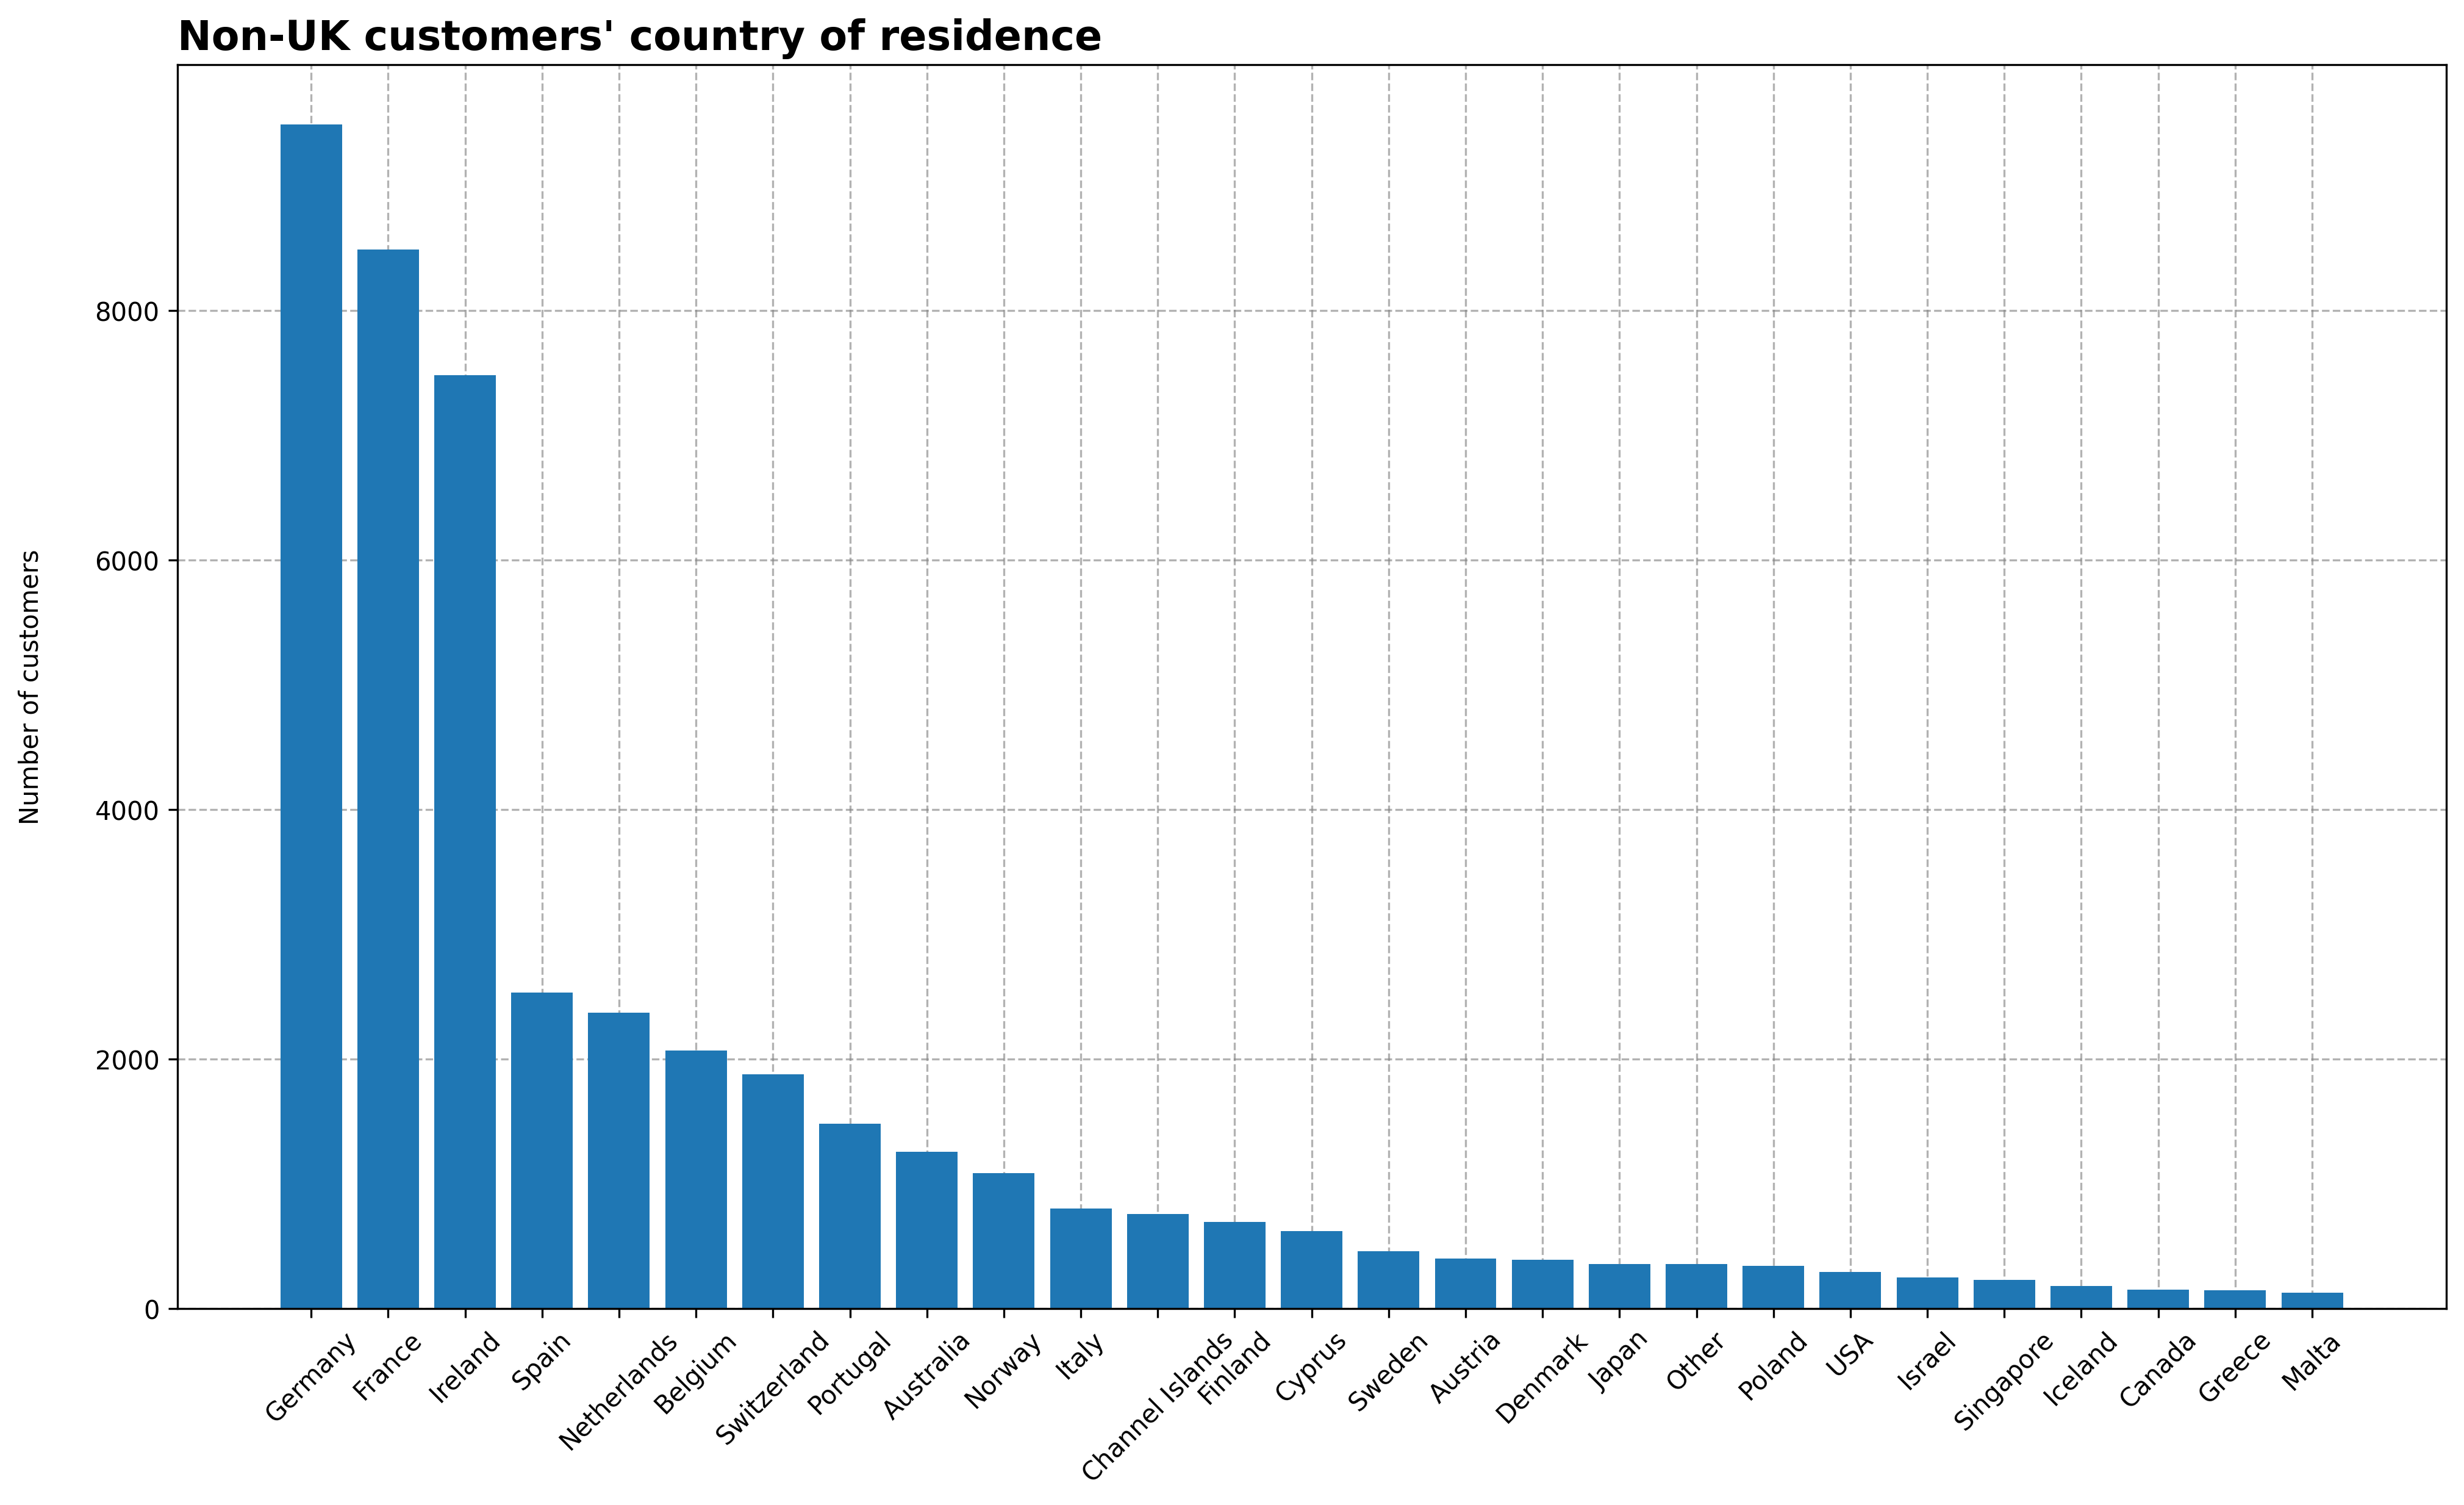

In [9]:
# названия стран x и частоты y
x = tab.index
y = tab.values

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

# сама диаграмма
ax.bar(x, y);

# заголовок с выравниванием по левому краю, 16 полужирный шрифт
ax.set_title("Non-UK customers' country of residence", 
             loc = "left",
             fontsize = 16,
             fontweight = "bold");

# подписи по оси X с поворотом на 45 градусов
ax.tick_params(axis = 'x', 
               labelrotation = 45)

# подпись ко всей оси Y с отступом от оси 20 пунктов
ax.set_ylabel("Number of customers",
              labelpad = 20);

# сетка с прозрачностью 40%
ax.grid(color = 'grey',
        alpha = 0.6,
        linestyle = 'dashed');

ax.set_axisbelow(True)

### Задача 3: подготовка данных 

Отберите строки исходного датафрейма, которые соответствуют покупкам пользователей из Германии (`Germany`) и сохраните их в датафрейм `grm`. Отберите из `grm` строки, которые соответствуют заказам, содержащим чашки или кружки (`MUG` в описании товара), и сохраните их в датафрейм `mugs`. 

Выберите топ-10 самых популярных кружек и по аналогии с задачей 1 сформируйте таблицу частот `mg`, где кружки с частотой менее 8 «схлопнуты» в категорию `OTHER`. Измените формат названий категорий – примените функцию, написанную ниже.

In [10]:
def get_clean(x):
    x = x.lower()
    x = x.replace("coffee mug", "mug").\
    replace("mug", "").replace("design", "")
    x = x.replace("  ", " ")
    x = x.strip().capitalize()
    return x

# фильтрация
grm = sales[sales["Country"] == "Germany"]
mugs = grm[grm["Description"].str.contains("MUG")]

# частоты значений, замена и агрегирование
mg = mugs["Description"].value_counts().head(10)
mg.rename(lambda x: "OTHER" if x in mg[mg < 8].index else x, inplace = True)
mg = mg.groupby(level = 0).sum().sort_values(ascending = False)
mg.rename(get_clean, inplace = True)
print(mg)

Apples                      30
Pears                       18
Children's circus parade    15
Children's spaceboy         15
Other                       15
Ceramic cake spotted        10
Save the planet              8
Name: Description, dtype: int64


### Задача 4: строим круговую и кольцевую диаграмму

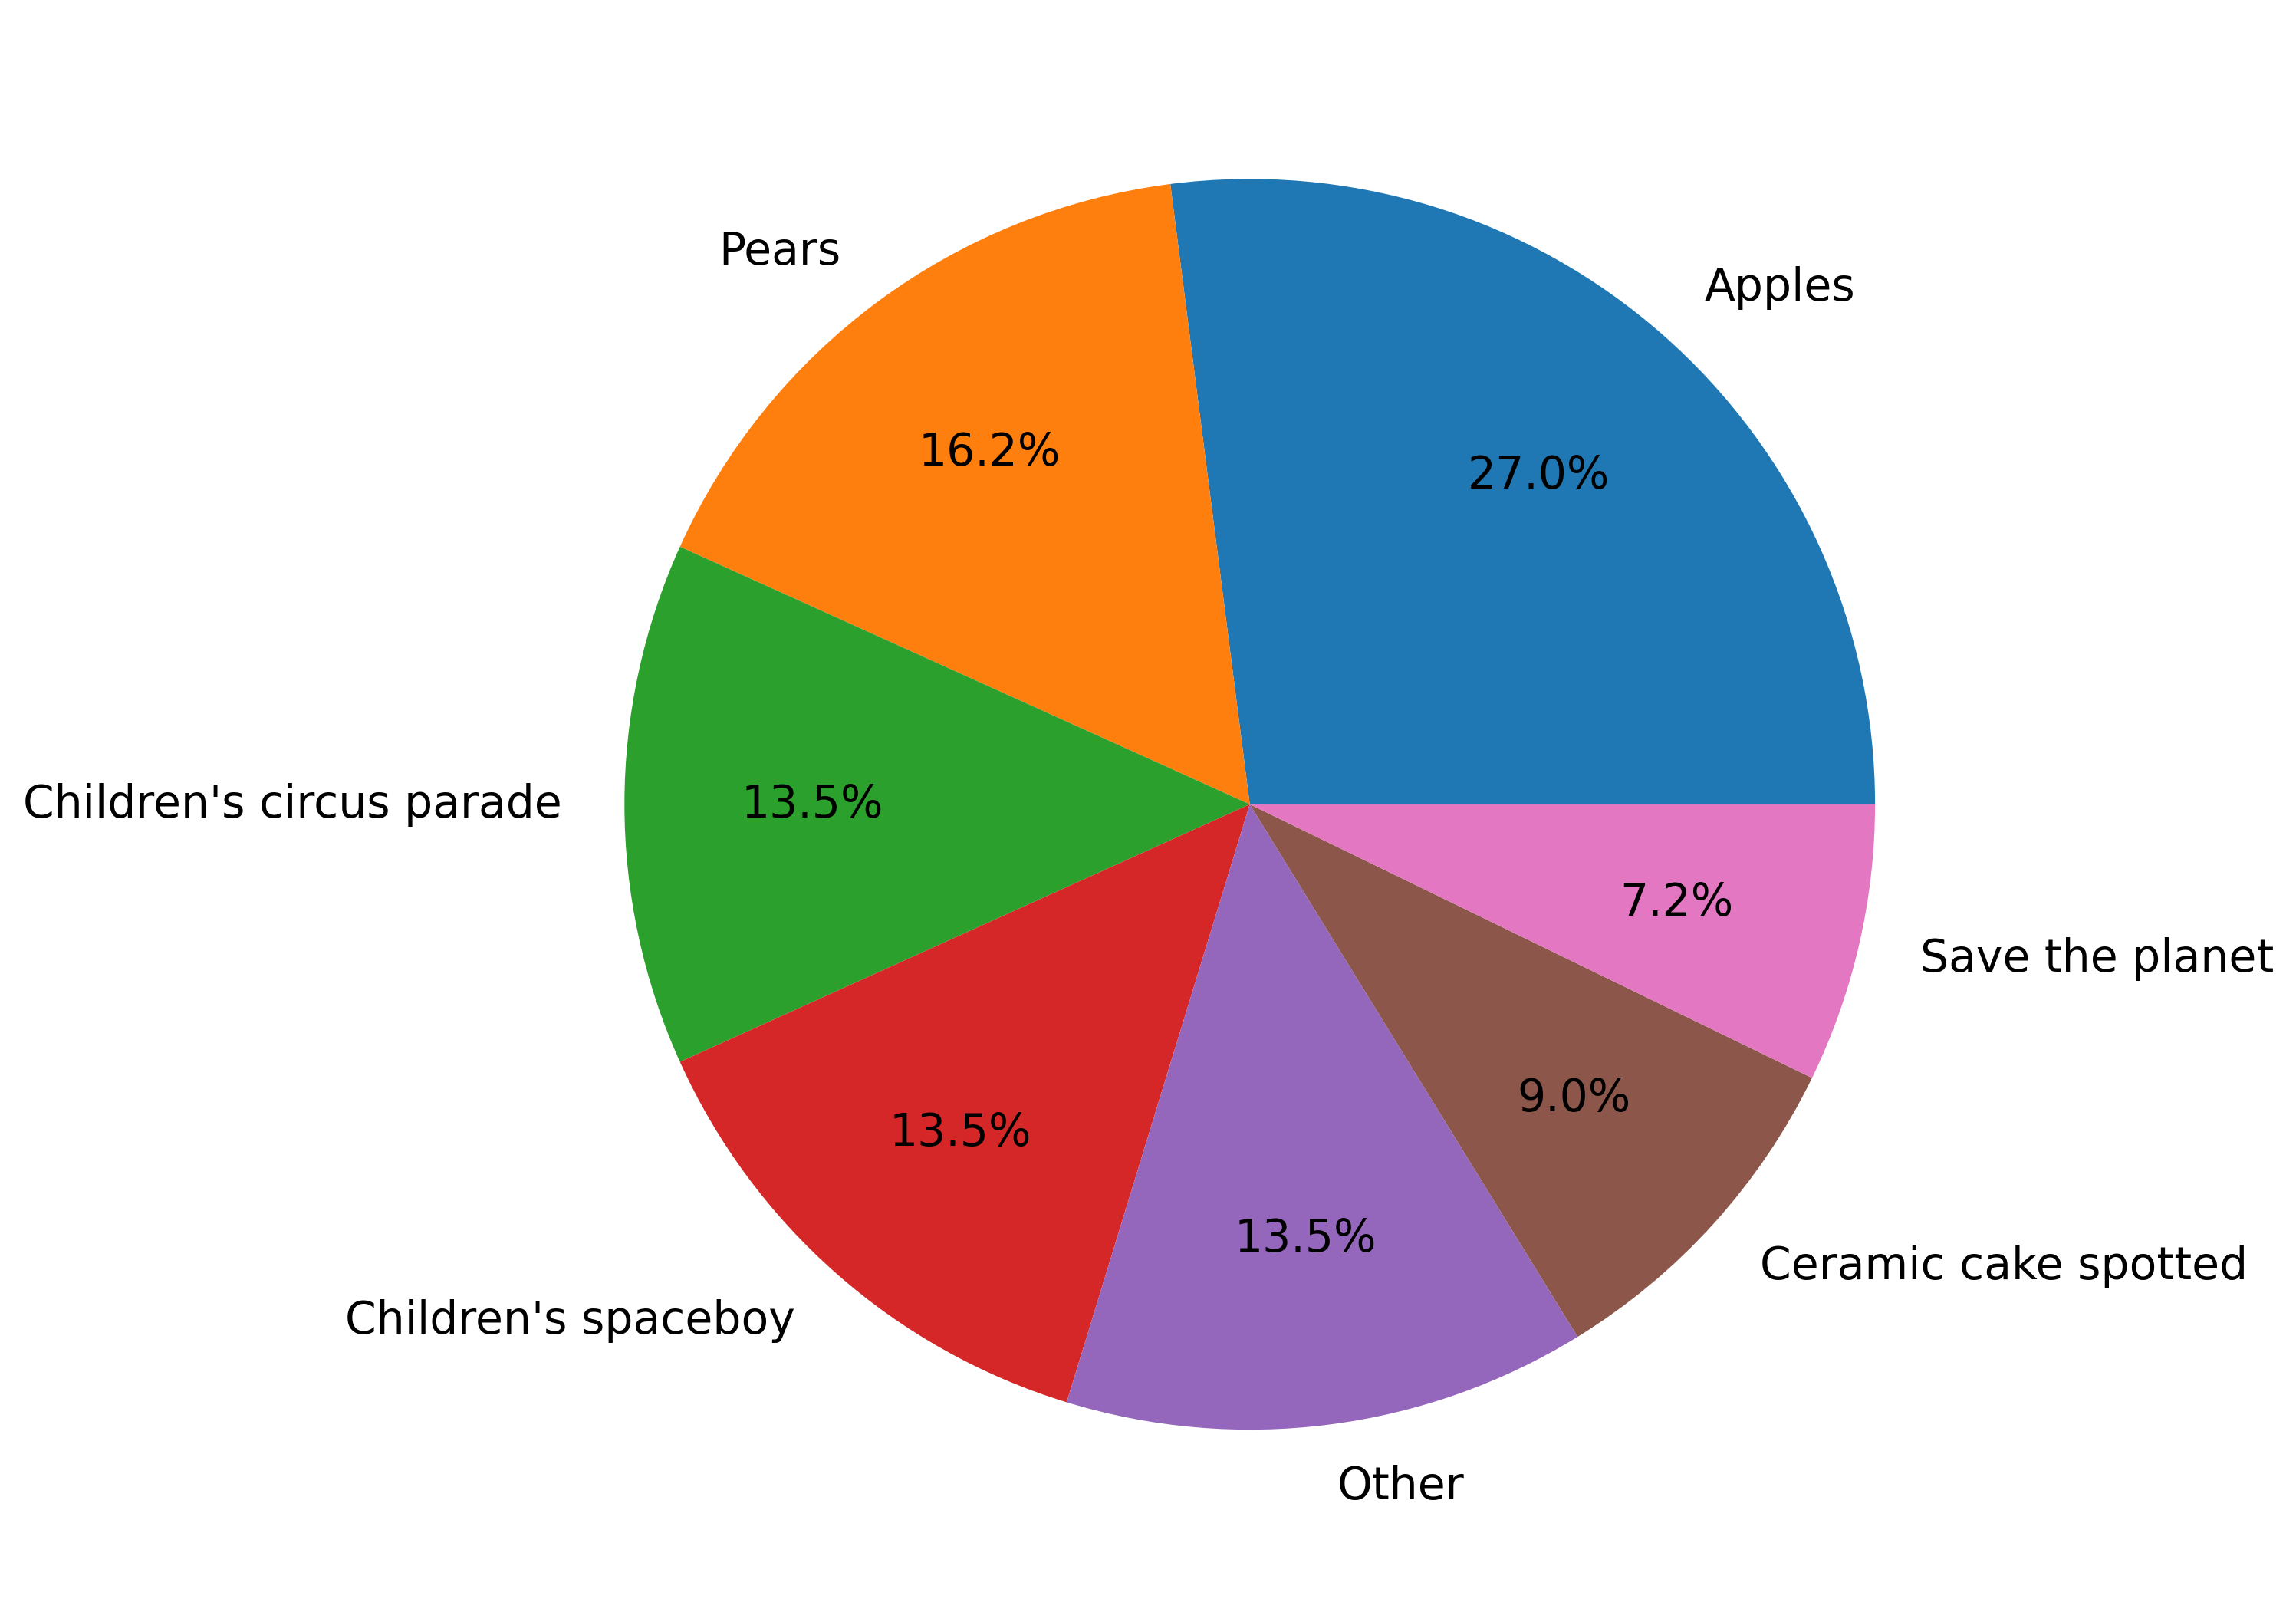

In [11]:
# ради всего святого, не стройте базовые круговые диаграммы, это катастрофа,
# но кольцевую без круговой не построишь

labs = mg.index
vals = mg.values

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

# autopct: автоподсчет процентов и их добавление в заданном формате
# pctdistance: расстояние подписей с процентами от центра
# textprops: словарь с настройками для текста

ax.pie(vals, labels = labs, 
       autopct = '%.1f%%', 
       pctdistance = 0.7,
       textprops = dict(fontsize = 14));

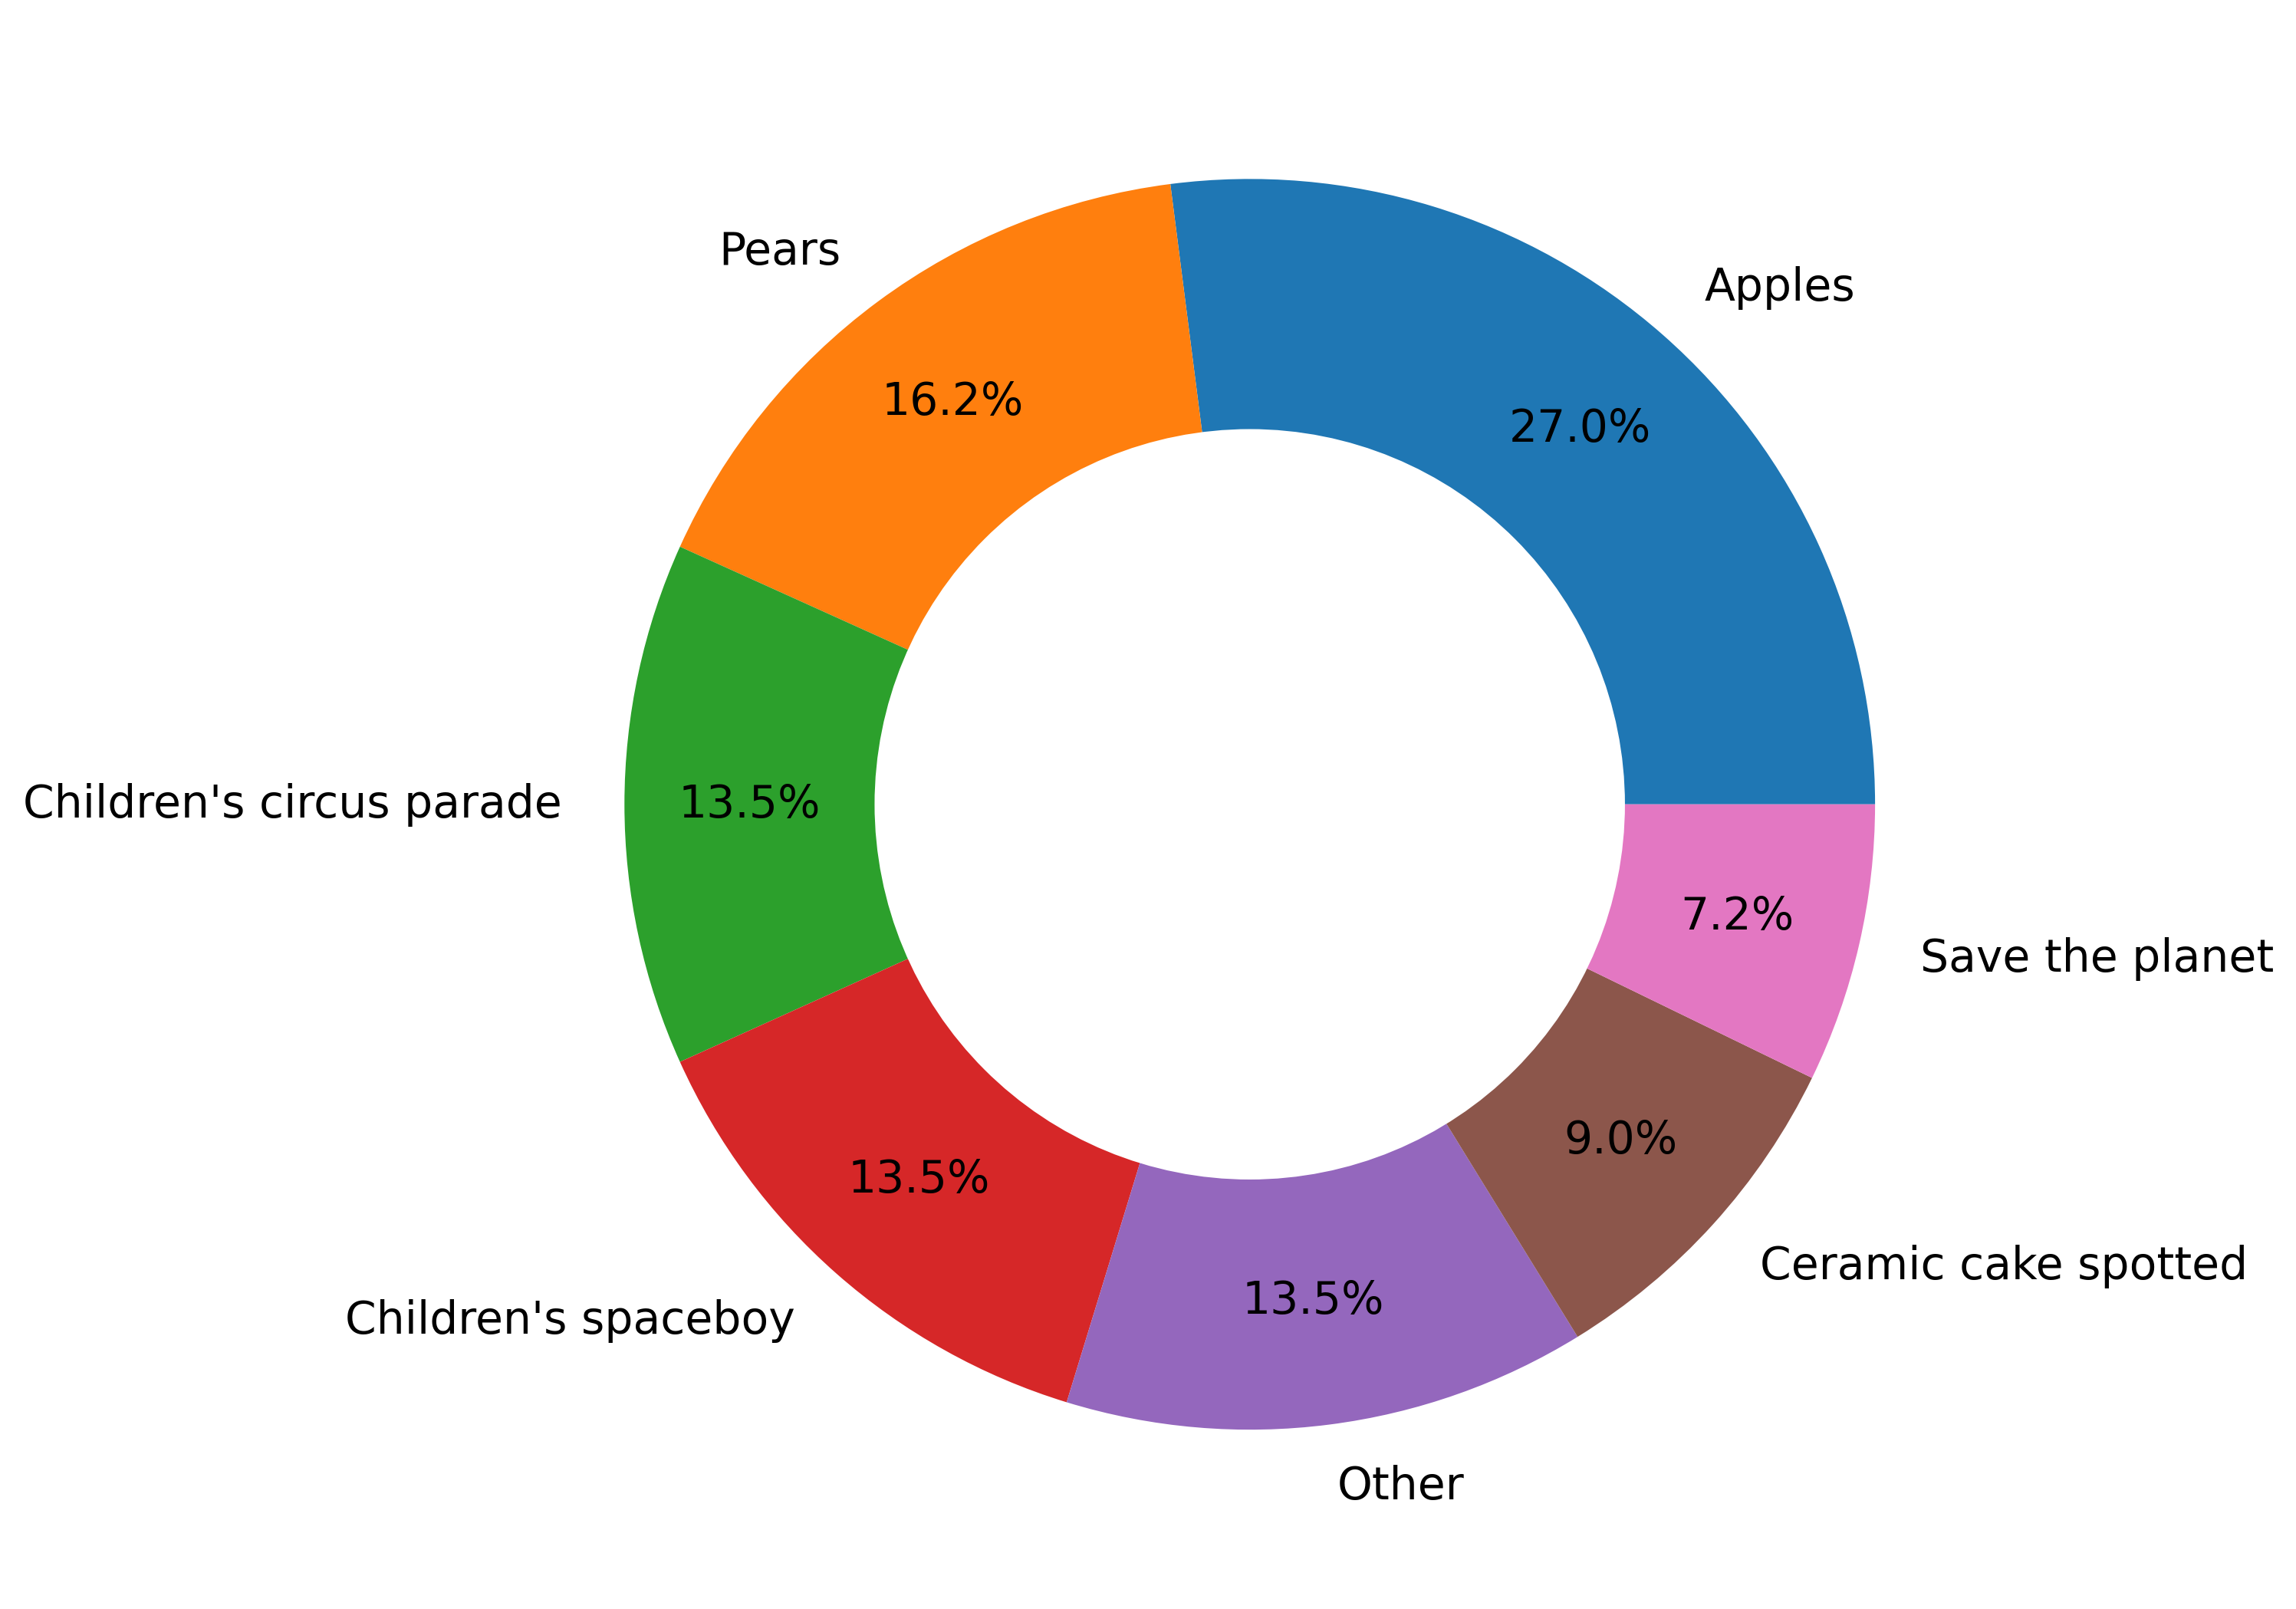

In [12]:
# переходим на кольцевую диаграмму (ring/donut diagram)

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

# оттается, как прежде, увеличили pctdistance
ax.pie(vals, labels = labs, 
       autopct = '%.1f%%', 
       pctdistance = 0.8,
       textprops = dict(fontsize = 14));

# создаем белый круг радиуса 0.6 с центром в нуле
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# добавляем круг – add_artist()
# в текущие оси графика – gca() от get current axes
fig.gca().add_artist(centre_circle);

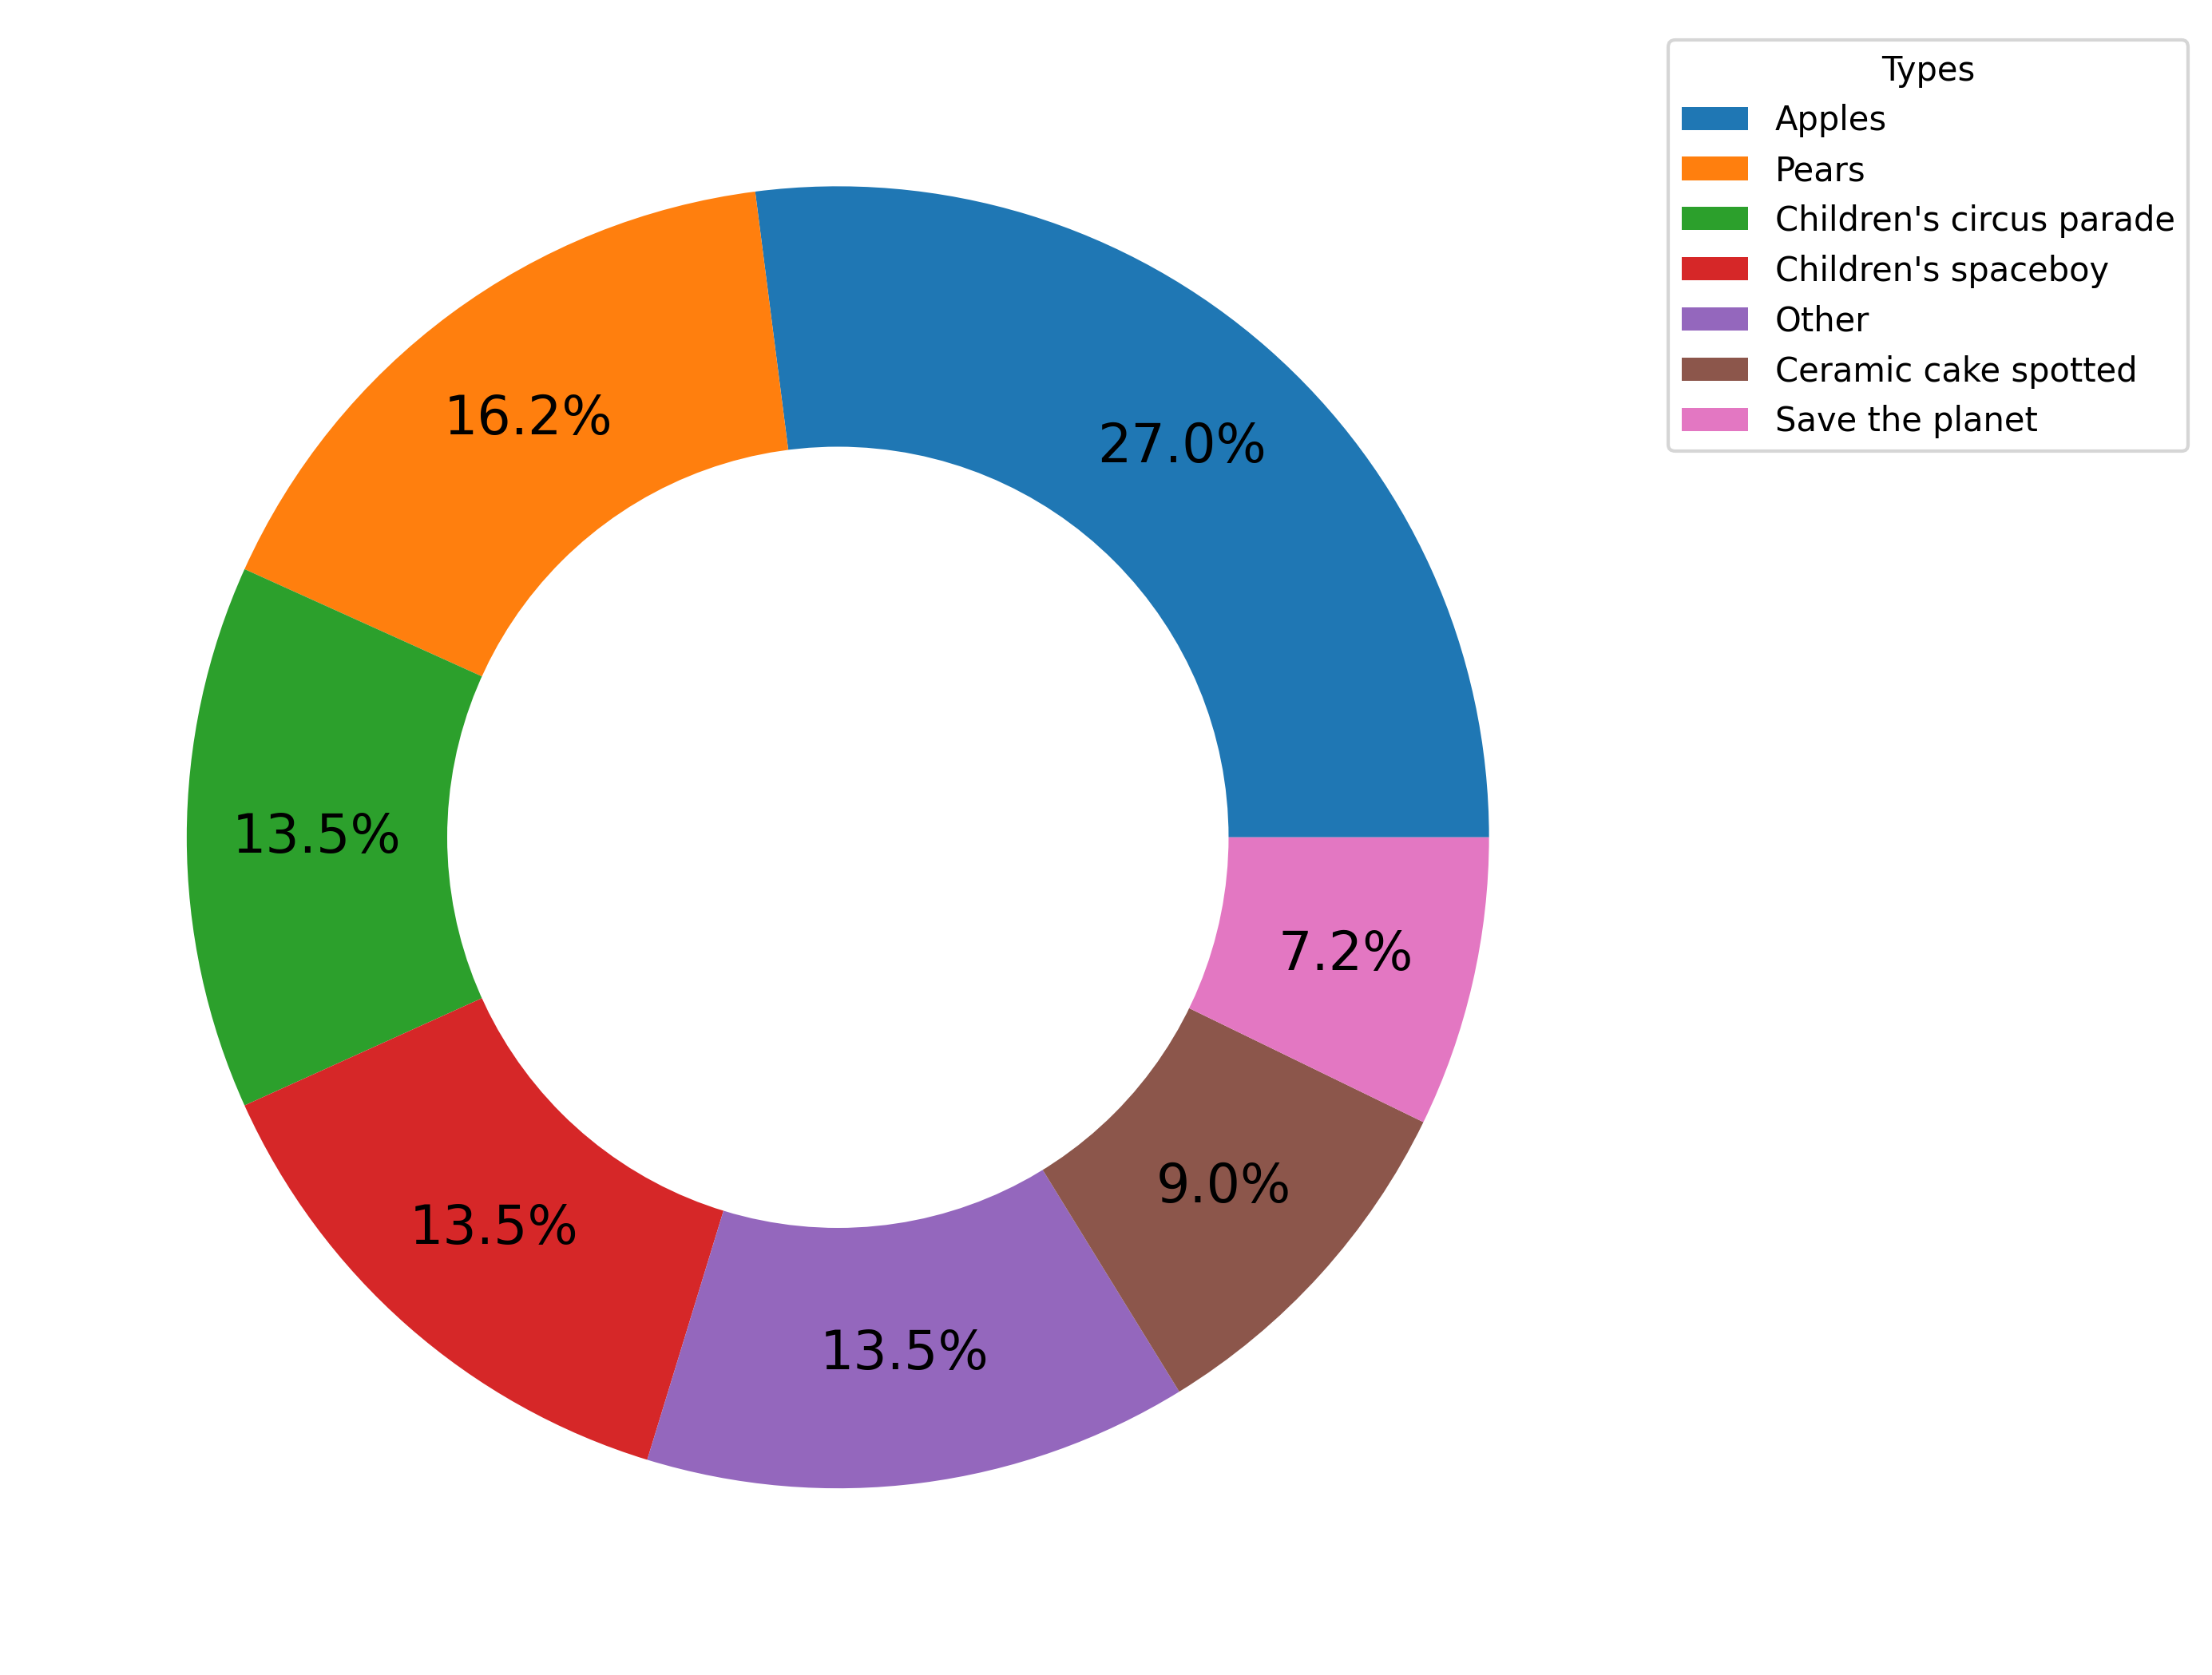

In [13]:
# выносим названия в легенду

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

# wedges – сектора, они же patches
# texts – подписи, они же labels
# autotexts – подписи с процентами

wedges, texts, autotexts = ax.pie(vals, 
                                  autopct = '%.1f%%',
                                  pctdistance = 0.8, 
                                  textprops = dict(fontsize = 16));

# легенда с заливкой и подписями
# фиксируем верний левый угол блока с легендой
# в точке (1, 0), ширина блока 0.5, высота 1

ax.legend(wedges, labs,
          title = "Types",
          loc = "upper left",
          bbox_to_anchor = (1, 0, 0.5, 1))

centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

fig.gca().add_artist(centre_circle);

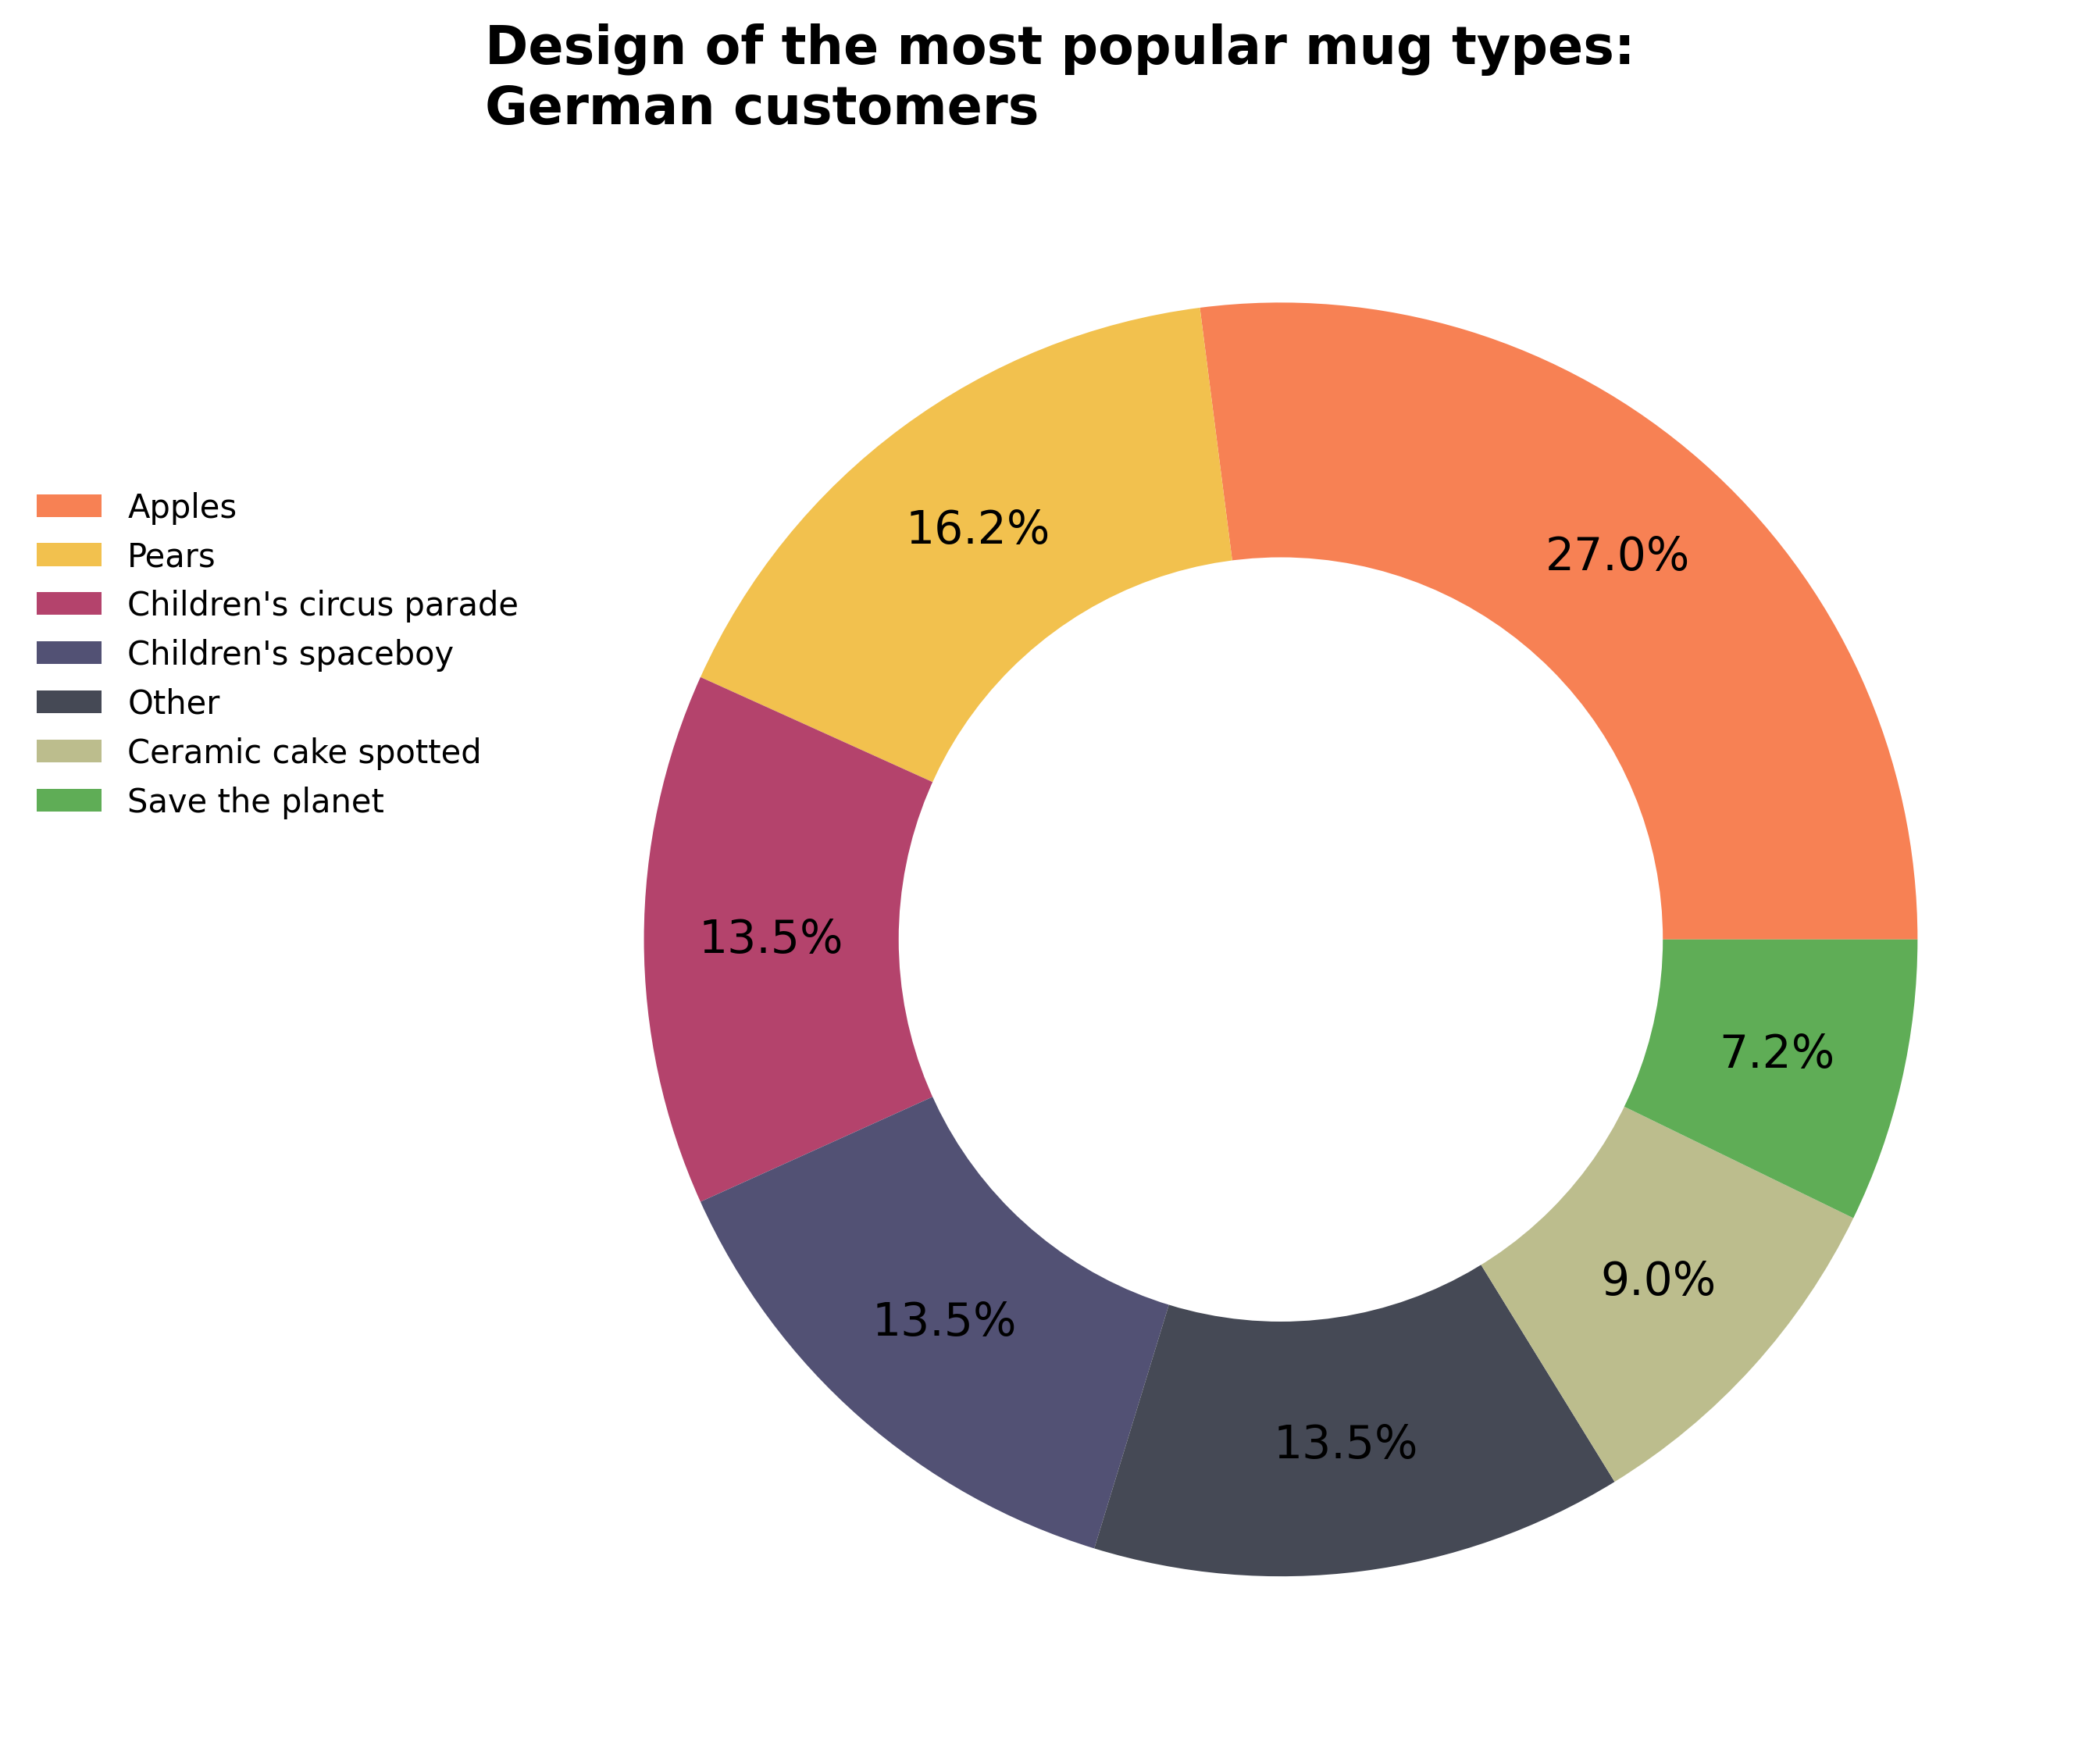

In [38]:
# добавляем свои цвета, исправляем легенду
# палитры https://coolors.co/

cols = ["#F78154", "#F2C14E", "#B4436C", "#525174", 
        "#454955", "#BCBD8D", "#5FAD56"]

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

wedges, texts, autotexts = ax.pie(vals, 
                                  colors = cols,
                                  autopct = "%.1f%%",
                                  pctdistance = 0.8,
                                  textprops = dict(fontsize = 14));

# выключаем рамку у легенды, двигаем ее

ax.legend(wedges, labs,
          loc = "upper left",
          bbox_to_anchor = (-0.3, 0.8),
          frameon = False);

# добавляем заголовок графика
ax.set_title("Design of the most popular mug types: \nGerman customers", 
            fontsize = 16, 
            loc = "left", 
            fontweight = "bold");

centre_circle = plt.Circle((0, 0), 0.6, fc = "white")
fig.gca().add_artist(centre_circle);

In [14]:
# изучаем составные части,
# чтобы позволить себе более тонкие настройки

print(wedges, end = "\n\n")
print(texts, end = "\n\n")
print(autotexts, end = "\n\n")

# wedges – сектора, тип patch
# из каждого сектора можем извлечь цвет
# без преобразований – формат RGBA с нормировкой
# Red, Green, Blue, Alpha (непрозрачность)

for wedge in wedges:
    print(wedge.get_facecolor())
    print([int(i * 255) for i in wedge.get_facecolor()[0:-1]])

[<matplotlib.patches.Wedge object at 0x11f7b0750>, <matplotlib.patches.Wedge object at 0x11f41df90>, <matplotlib.patches.Wedge object at 0x11f7ad450>, <matplotlib.patches.Wedge object at 0x11f7ae450>, <matplotlib.patches.Wedge object at 0x11f7a85d0>, <matplotlib.patches.Wedge object at 0x11f7a4590>, <matplotlib.patches.Wedge object at 0x11f7a3fd0>]

[Text(0.7267422270715143, 0.8257395081931929, ''), Text(-0.6540964066556546, 0.8843969079548847, ''), Text(-1.0999999999999892, 1.5448414920775265e-07, ''), Text(-0.7267423430384756, -0.8257394061294077, ''), Text(0.13971936566007678, -1.0910905090135952, ''), Text(0.8153726617471805, -0.7383545371129767, ''), Text(1.0719236158391656, -0.24694080628014708, '')]

[Text(0.5285398015065558, 0.6005378241405039, '27.0%'), Text(-0.47570647756774875, 0.6431977512399162, '16.2%'), Text(-0.7999999999999922, 1.123521085147292e-07, '13.5%'), Text(-0.5285398858461641, -0.6005377499122965, '13.5%'), Text(0.10161408411641948, -0.7935203701917055, '13.5%'

In [15]:
# аналогично забираем цвета подписей

print([atext.get_color() for atext in autotexts])

# создаем свой список цветов для подписей с процентами (white, black)
# изменяем атрибут color внутри каждого элемента в autotexts

text_cols = ["k", "k", "w", "w", "w", "k", "k"]

for autotext, color in zip(autotexts, text_cols):
    autotext.set_color(color)
    
print([atext.get_color() for atext in autotexts])

['black', 'black', 'black', 'black', 'black', 'black', 'black']
['k', 'k', 'w', 'w', 'w', 'k', 'k']


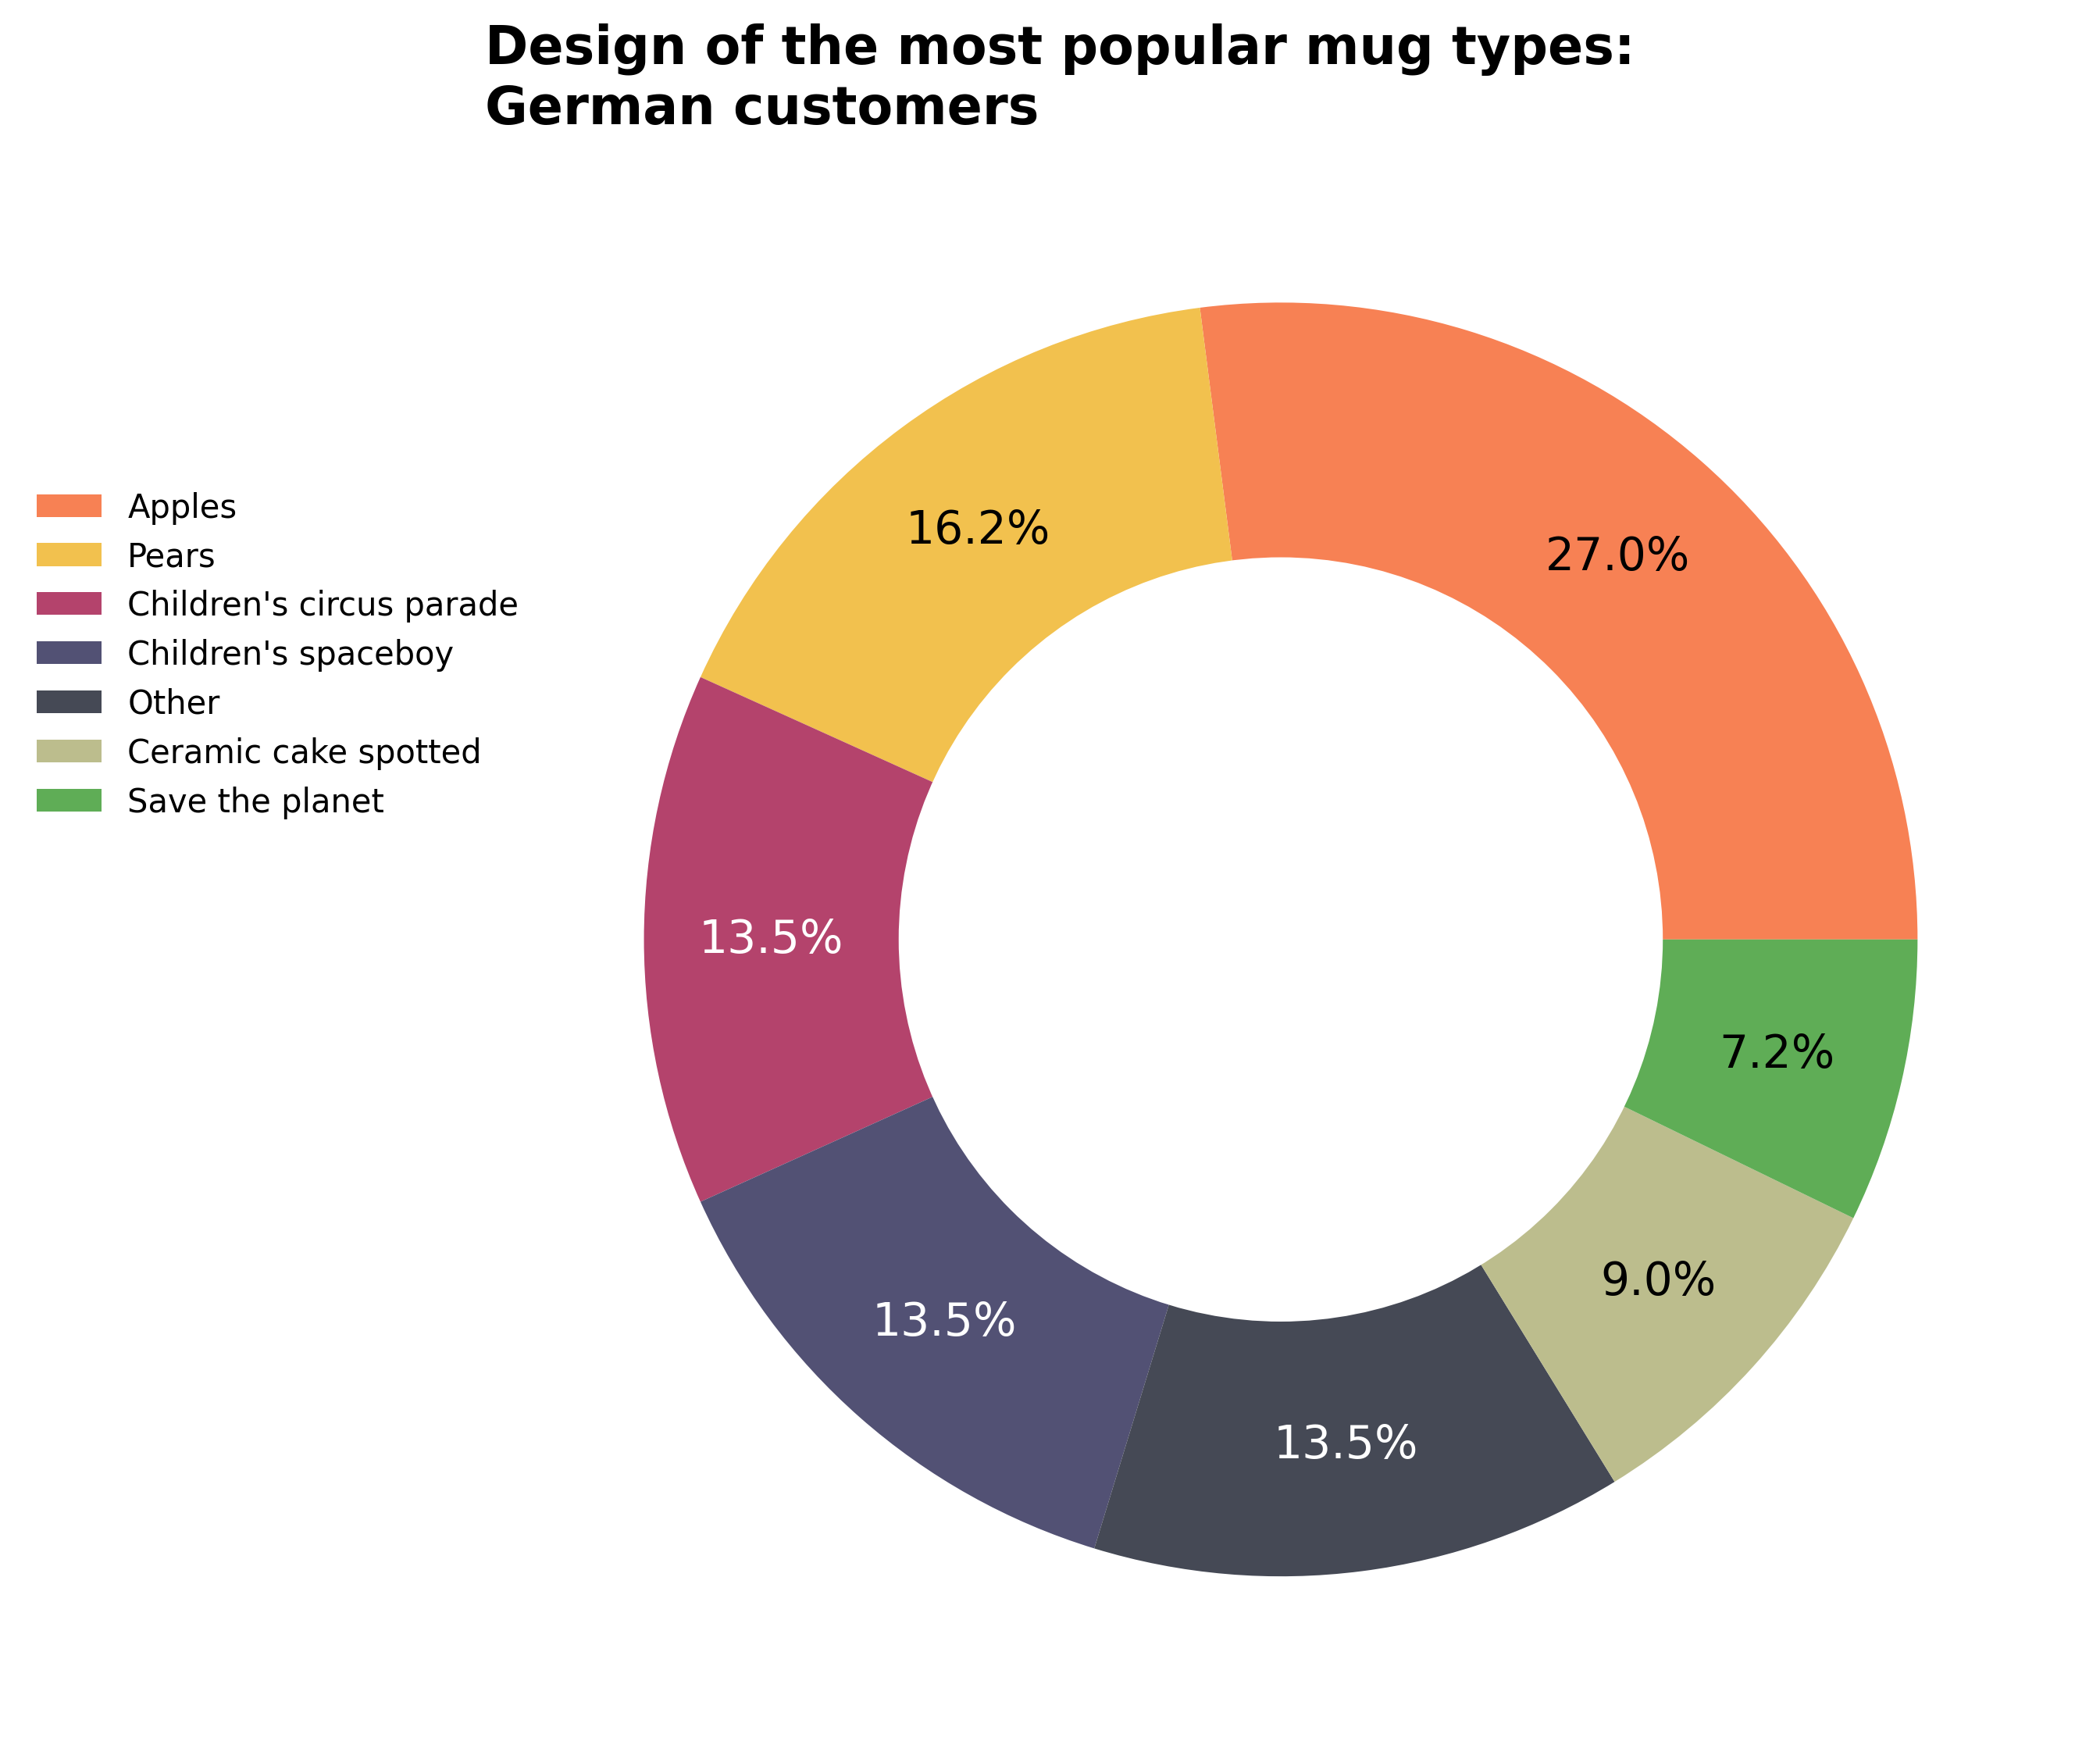

In [16]:
# обновляем график с учетом блока кода для цветов подписей

cols = ["#F78154", "#F2C14E", "#B4436C", "#525174", 
        "#454955", "#BCBD8D", "#5FAD56"]

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

wedges, texts, autotexts = ax.pie(vals, 
                                  colors = cols,
                                  autopct = "%.1f%%",
                                  pctdistance = 0.8,
                                  textprops = dict(fontsize = 14));

# добавляем фрагмент с изменением цвета текста сюда
# после определения autotexts

text_cols = ["k", "k", "w", "w", "w", "k", "k"]

for autotext, color in zip(autotexts, text_cols):
    autotext.set_color(color)

ax.legend(wedges, labs,
          loc = "upper left",
          bbox_to_anchor = (-0.3, 0.8),
          frameon = False);

ax.set_title("Design of the most popular mug types: \nGerman customers", 
            fontsize = 16, 
            loc = "left", 
            fontweight = "bold");

centre_circle = plt.Circle((0, 0), 0.6, fc = "white")
fig.gca().add_artist(centre_circle);

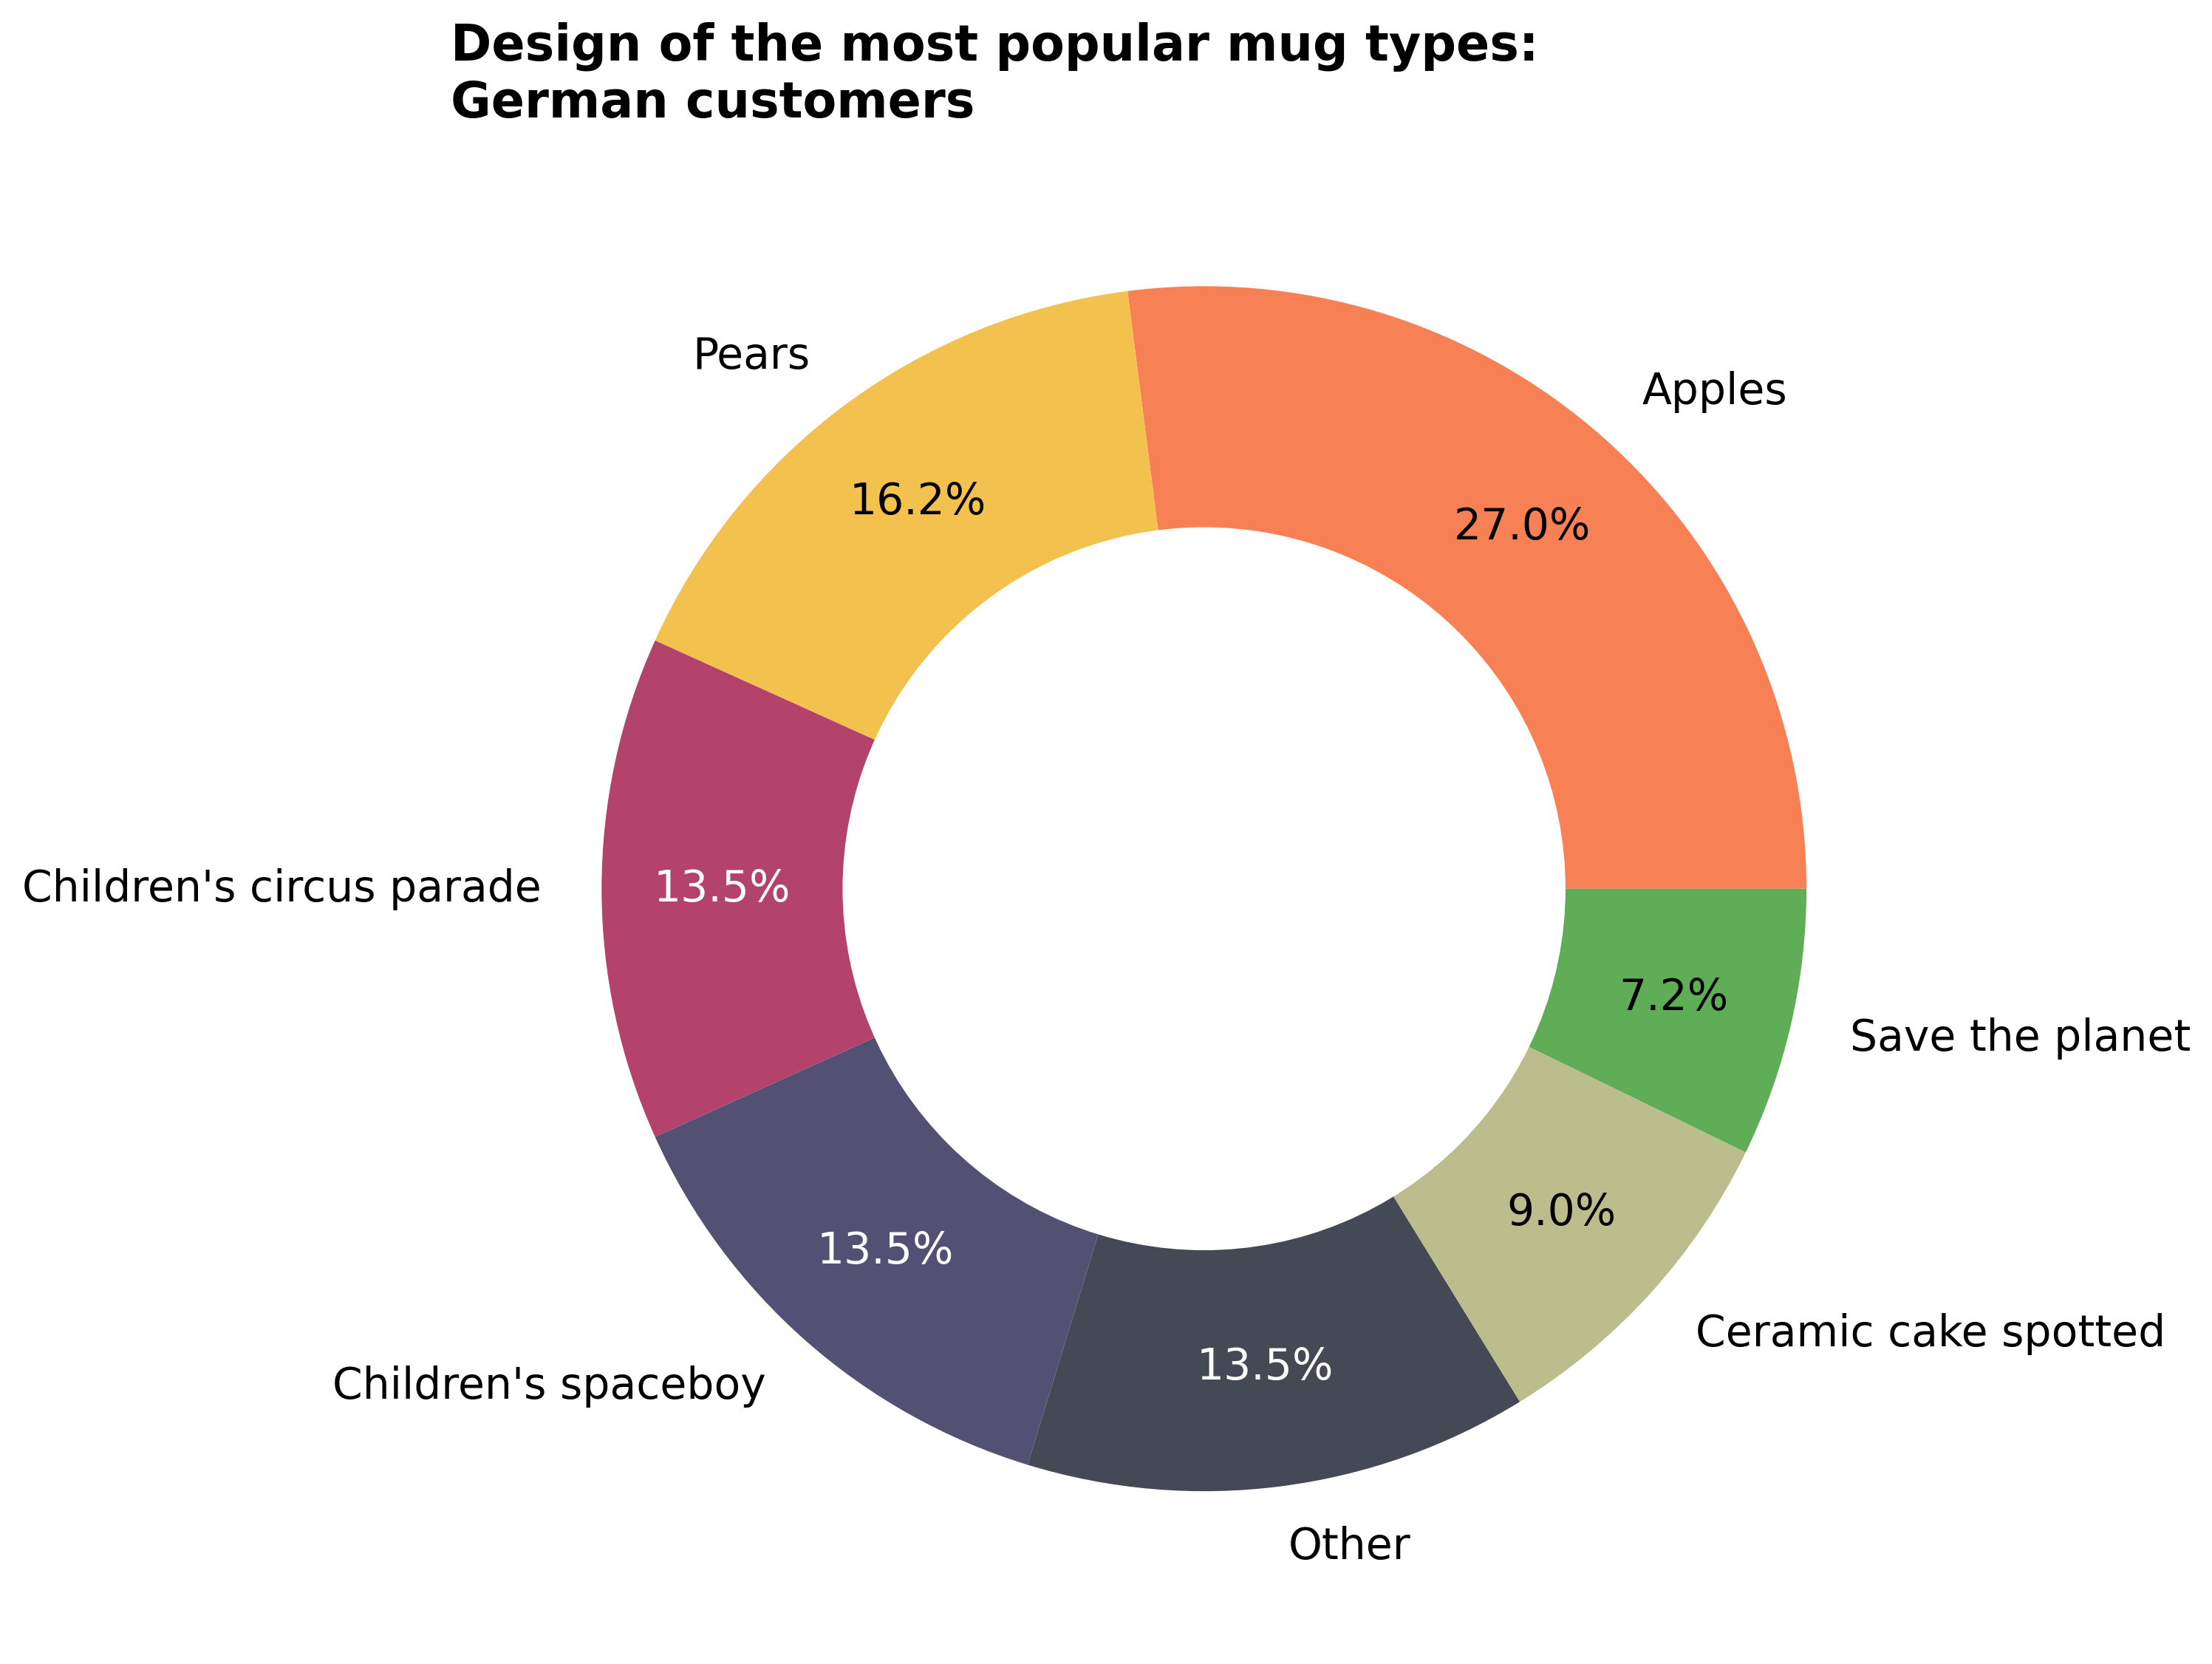

In [17]:
# попробуем убрать легенду

cols = ["#F78154", "#F2C14E", "#B4436C", "#525174", 
        "#454955", "#BCBD8D", "#5FAD56"]

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

wedges, texts, autotexts = ax.pie(vals,
                                  labels = labs,
                                  colors = cols,
                                  autopct = "%.1f%%",
                                  pctdistance = 0.8,
                                  textprops = dict(fontsize = 14));

text_cols = ["k", "k", "w", "w", "w", "k", "k"]

for autotext, color in zip(autotexts, text_cols):
    autotext.set_color(color)
    
ax.set_title("Design of the most popular mug types: \nGerman customers", 
            fontsize = 16, 
            loc = "left", 
            fontweight = "bold");

centre_circle = plt.Circle((0, 0), 0.6, fc = "white")
fig.gca().add_artist(centre_circle);

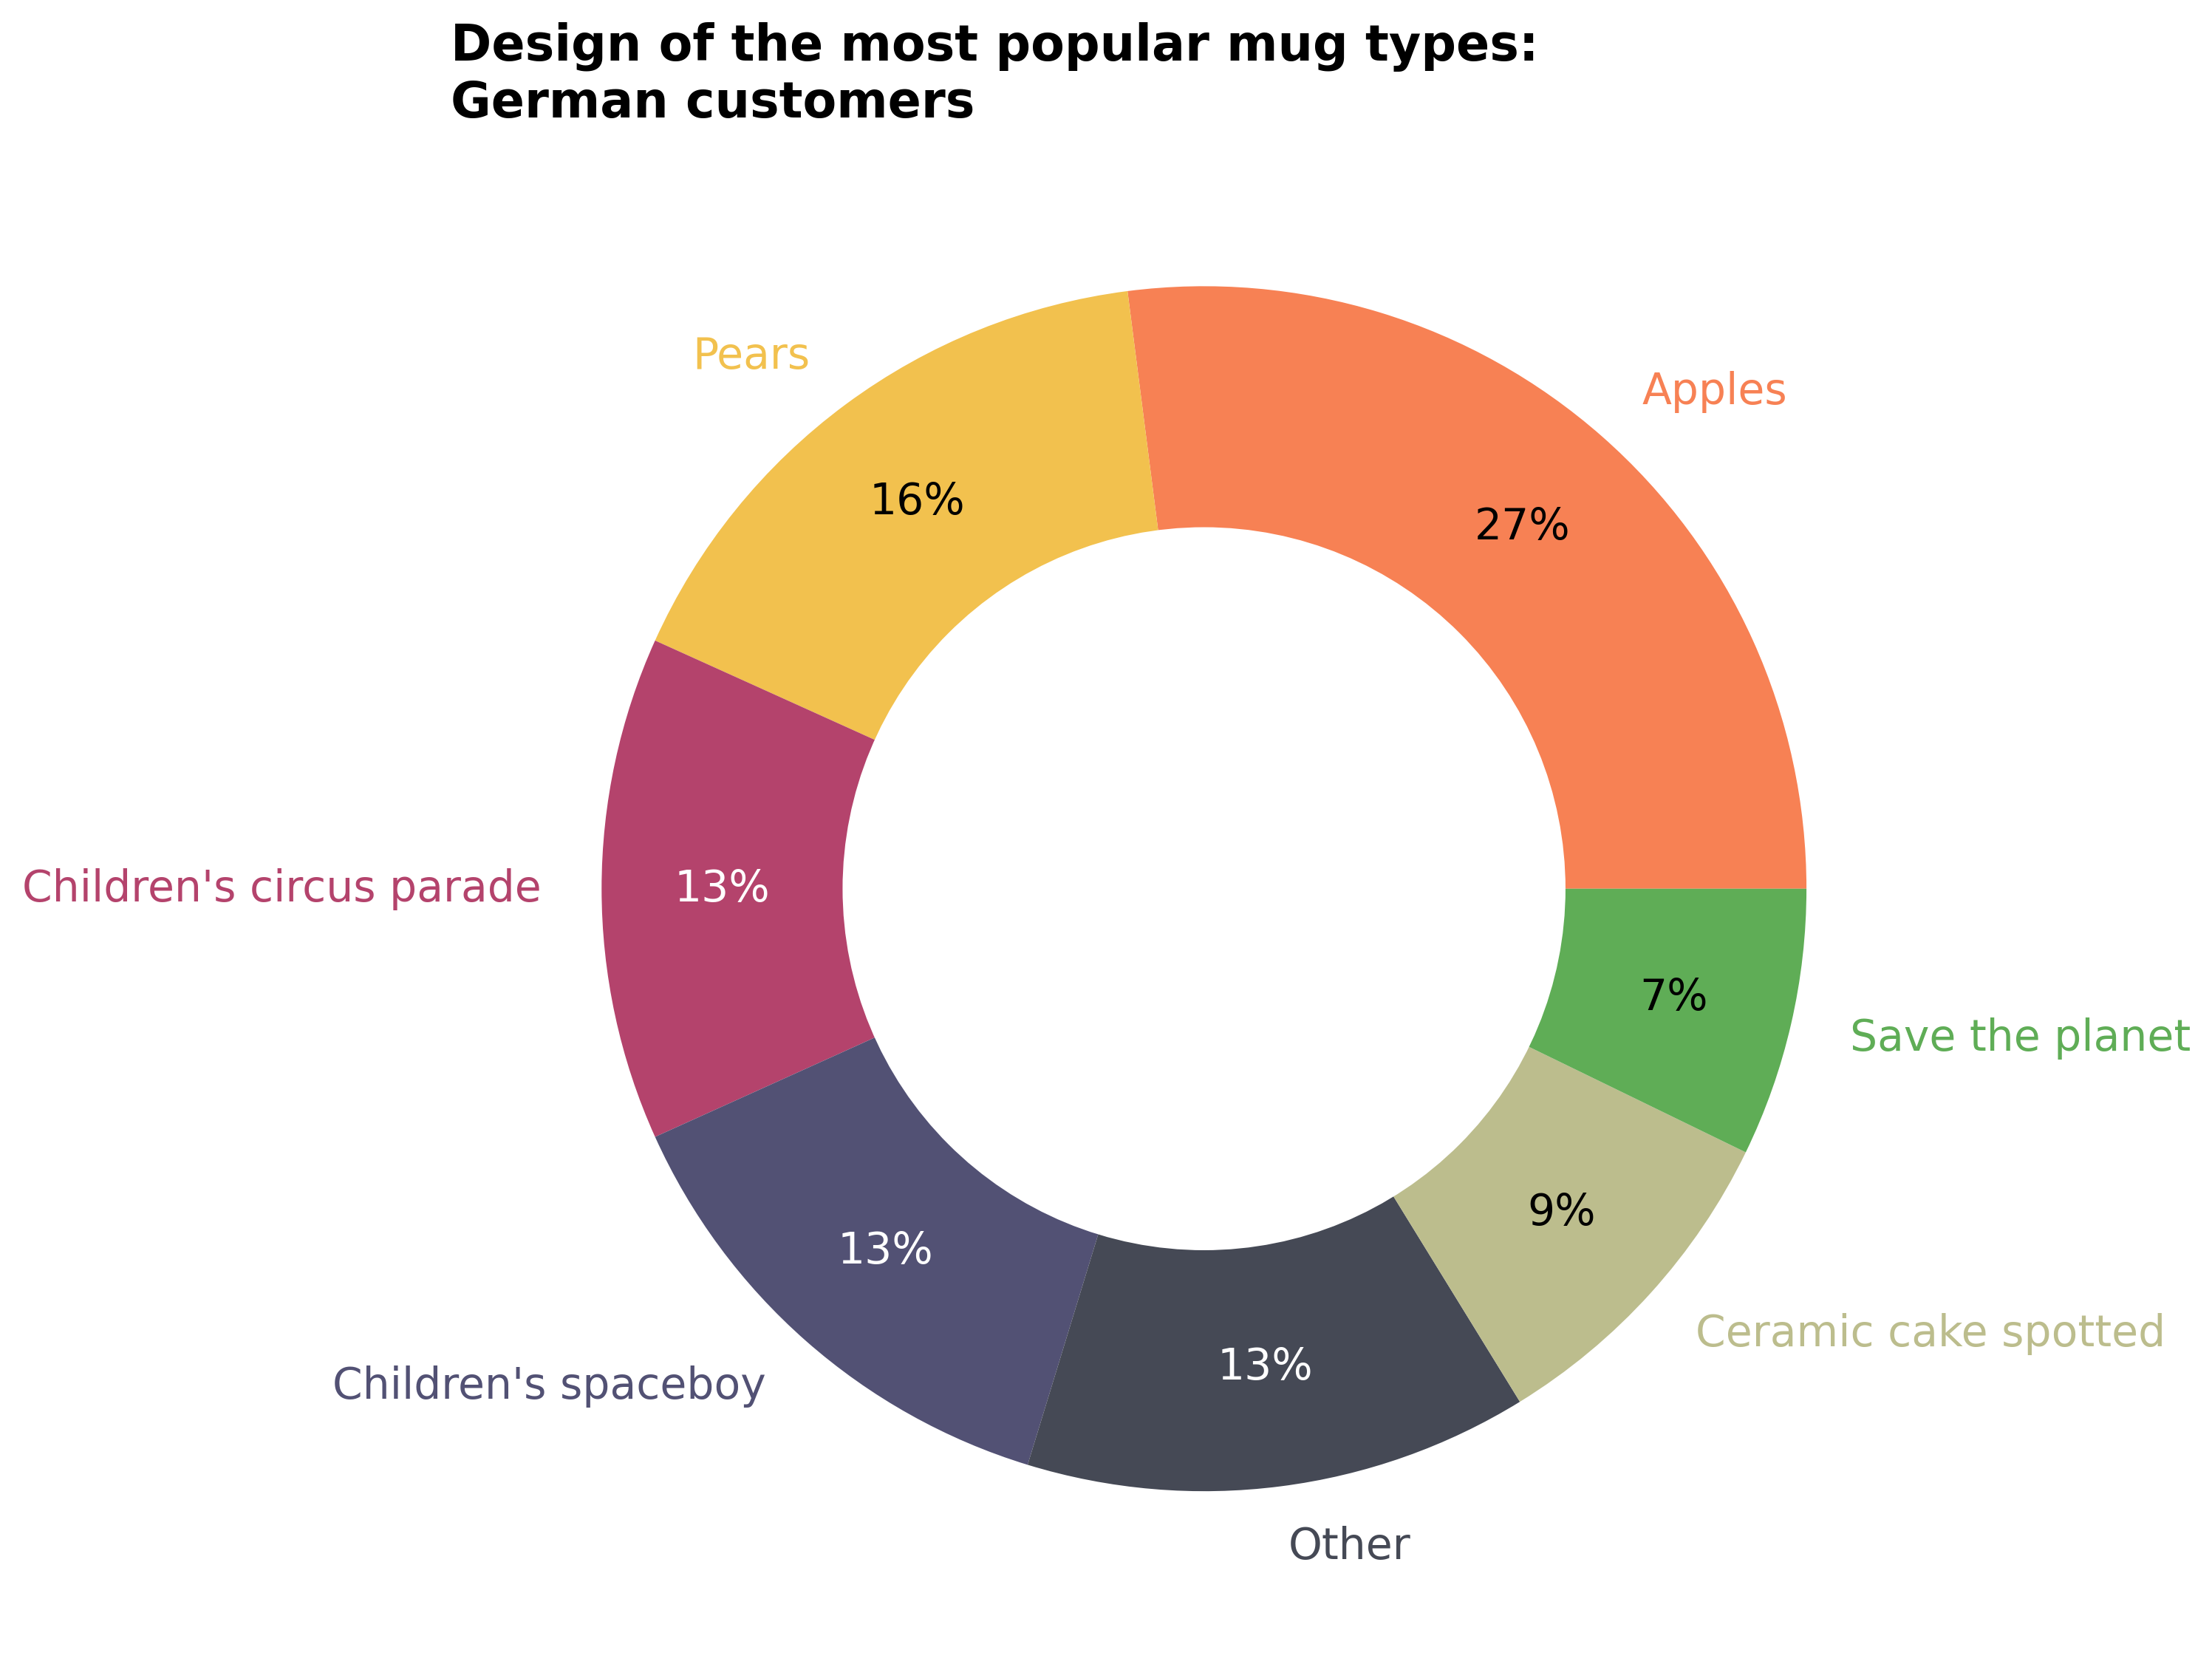

In [18]:
# завершающий этап: делаем цвета подписей такими же, 
# как и у секторов, и без легенды хорошо

cols = ["#F78154", "#F2C14E", "#B4436C", "#525174", 
        "#454955", "#BCBD8D", "#5FAD56"]

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

wedges, texts, autotexts = ax.pie(vals,
                                  labels = labs,
                                  colors = cols,
                                  autopct = "%i%%",
                                  pctdistance = 0.8,
                                  textprops = dict(fontsize = 14));

# прошлый фрагмент кода для цвета процентов

text_cols = ["k", "k", "w", "w", "w", "k", "k"]

for autotext, color in zip(autotexts, text_cols):
    autotext.set_color(color)
    
# новый фрагмент кода для согласования цветов
# забираем цвет сектора через get_facecolor()
# выставляем его в подписях через set_color()

for i, wedge in enumerate(wedges):
    texts[i].set_color(wedge.get_facecolor())
    
ax.set_title("Design of the most popular mug types: \nGerman customers", 
            fontsize = 16, 
            loc = "left", 
            fontweight = "bold");

centre_circle = plt.Circle((0, 0), 0.6, fc = "white")
fig.gca().add_artist(centre_circle);

# хватит развлекаться, сохраняем и идём дальше

fig.savefig("ring.png")

In [ ]:
### TO DO LIST ###

# выбрать более темные цвета для Pears и Cake
# разбить длинные подписи на две строки
# подвинуть заголовок

### Задача 5: подготовка данных

Добавьте в исходный датафрейм столбец `Month` с номером месяца, извлечённым из даты покупки. Сформируйте таблицу частот `sales_time`, которая показывает, сколько в сумме было куплено товаров за каждый месяц. Упорядочьте месяцы в хронологическом порядке.

In [19]:
# извлекаем части по группам (регулярные выражения) 
# каждая группа извлекается в отдельный столбец, берем первый

sales["Month"] = sales["InvoiceDate"].str.extract("(\d+)/(\d+)/(\d+)").iloc[:, 0]
sales_time = sales.groupby("Month")["Quantity"].sum()

# zfill(2) – добавление 0 в начало строки, чтобы было 2 знака
# если уже два знака – ничего не добавляется

sales_time.rename(lambda x: x.zfill(2), inplace = True)
sales_time.sort_index(inplace = True)
print(sales_time)

Month
01    269379
02    262833
03    344012
04    278585
05    367852
06    356922
07    363418
08    386612
09    537496
10    569666
11    669915
12    500198
Name: Quantity, dtype: int64


### Задача 6: строим линейный график для динамики

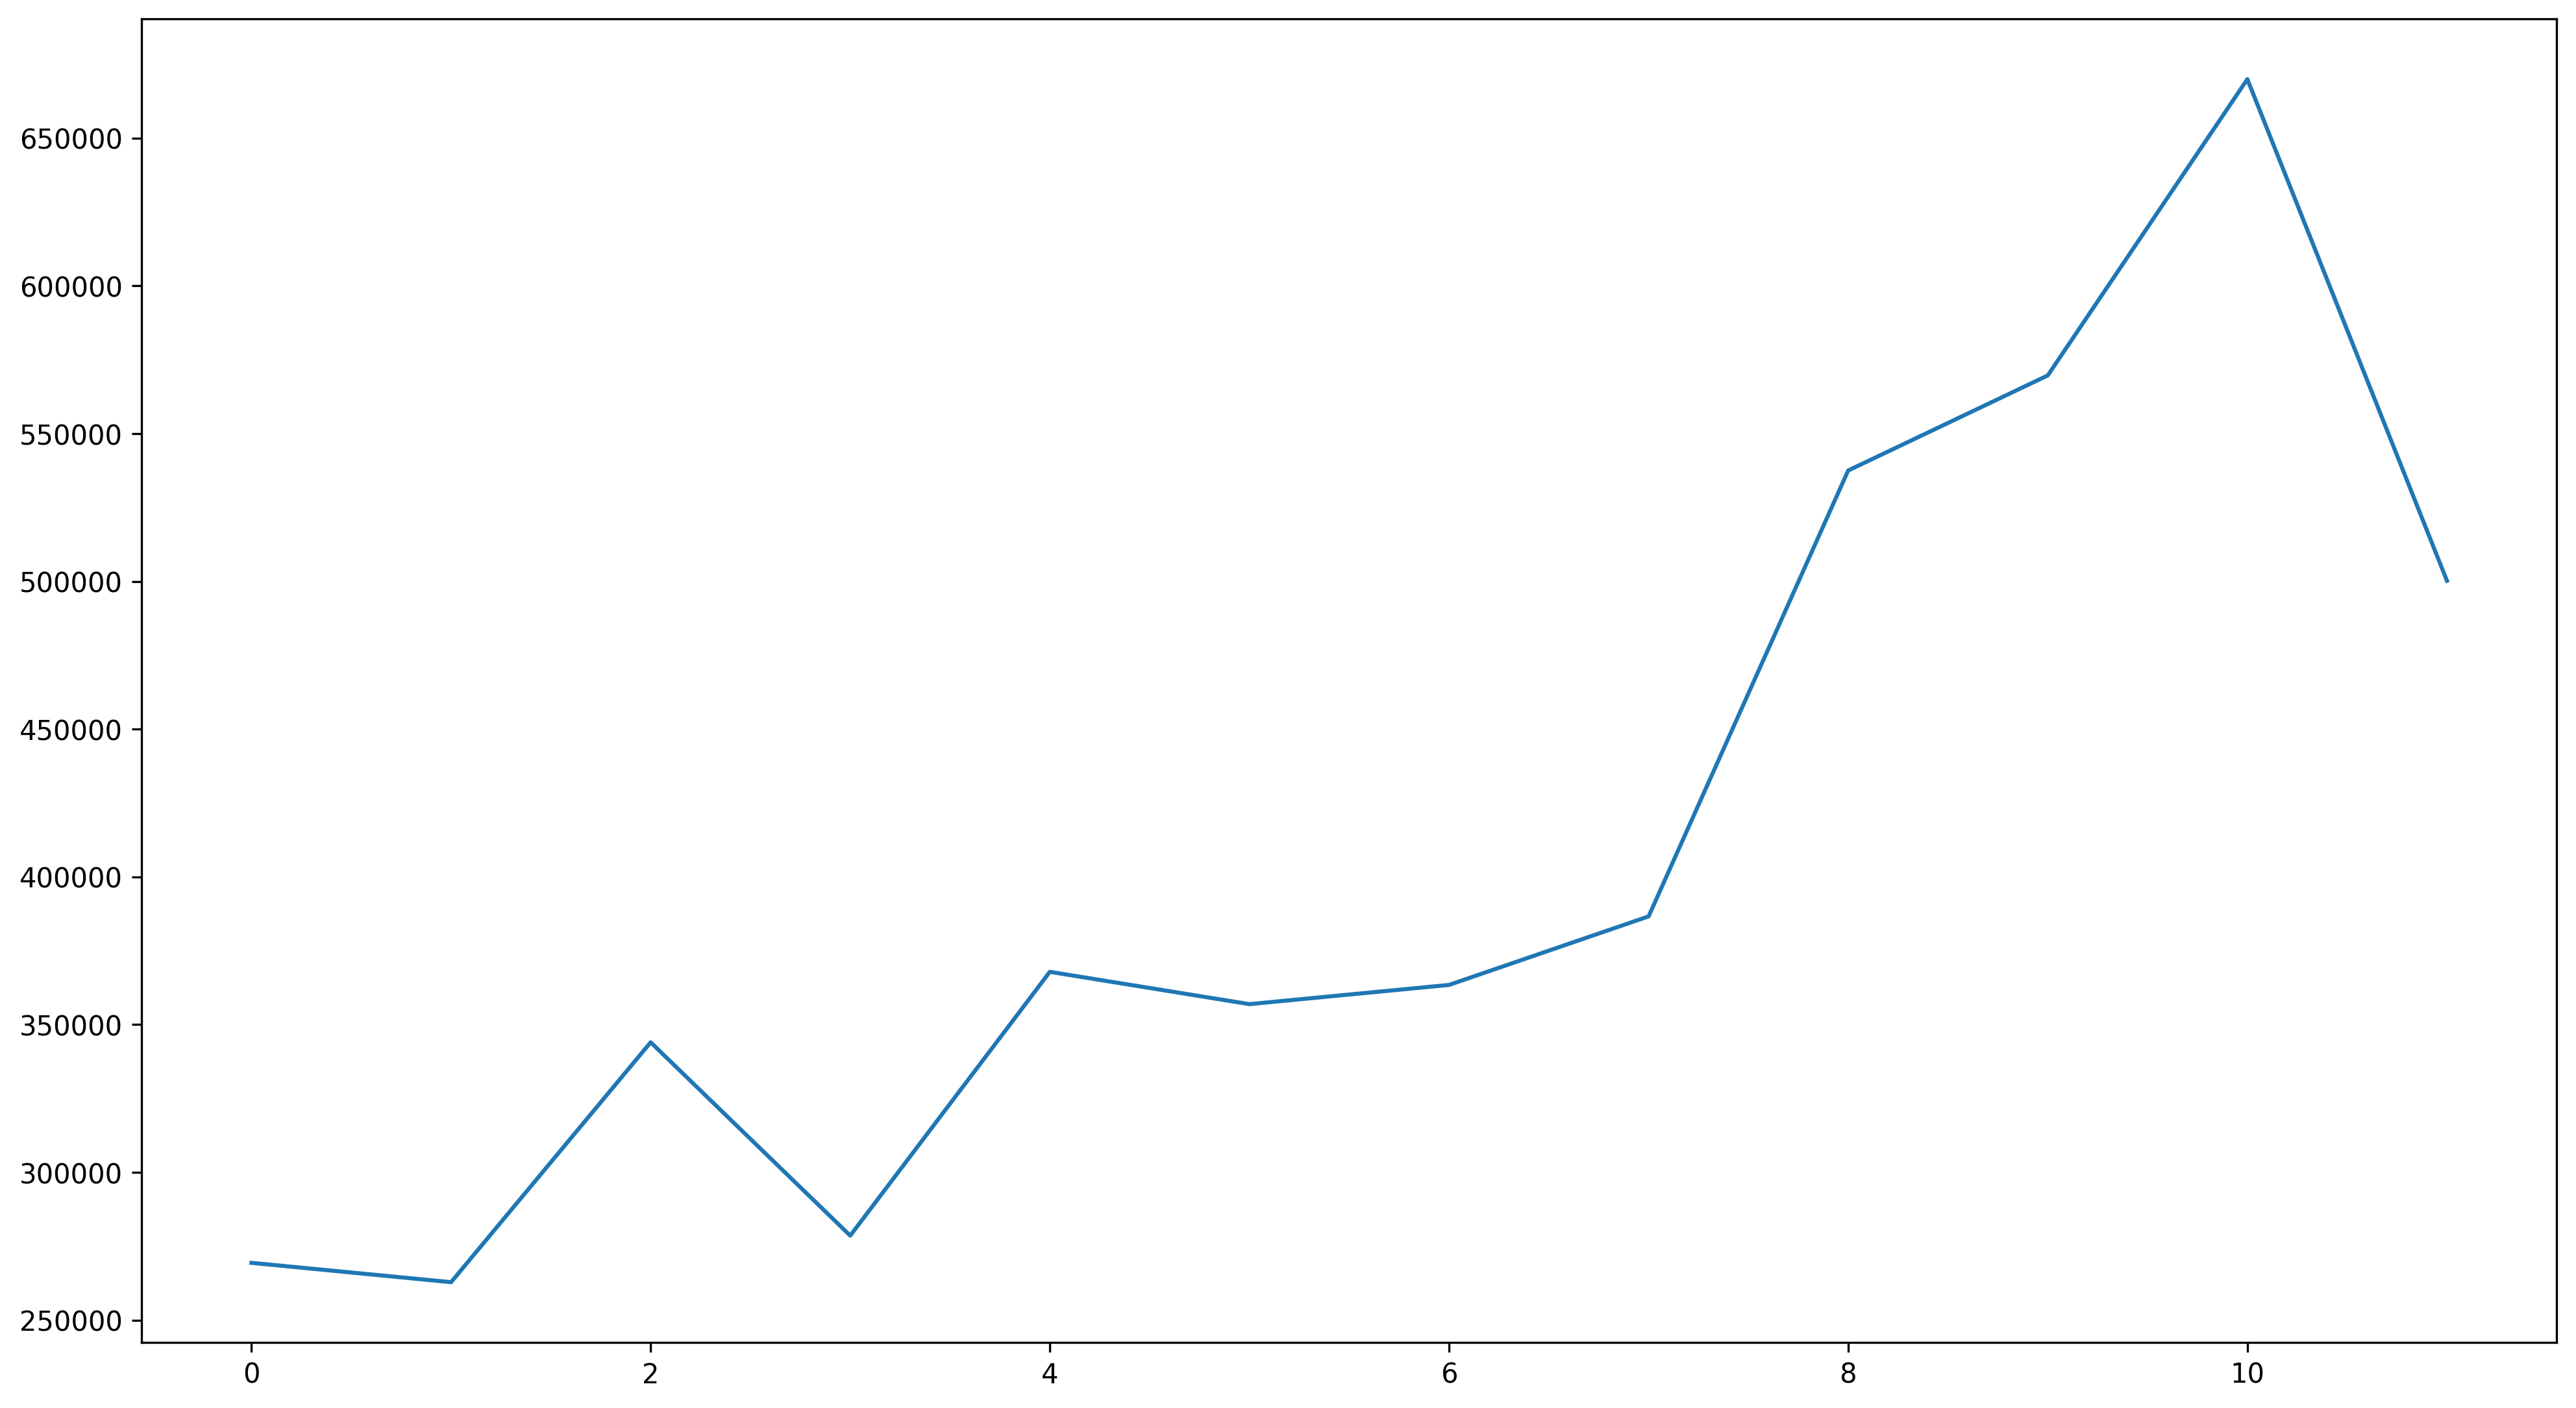

In [20]:
# простой график

x_ = range(0, 12)
y_ = sales_time.values

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)
ax.plot(x_, y_);

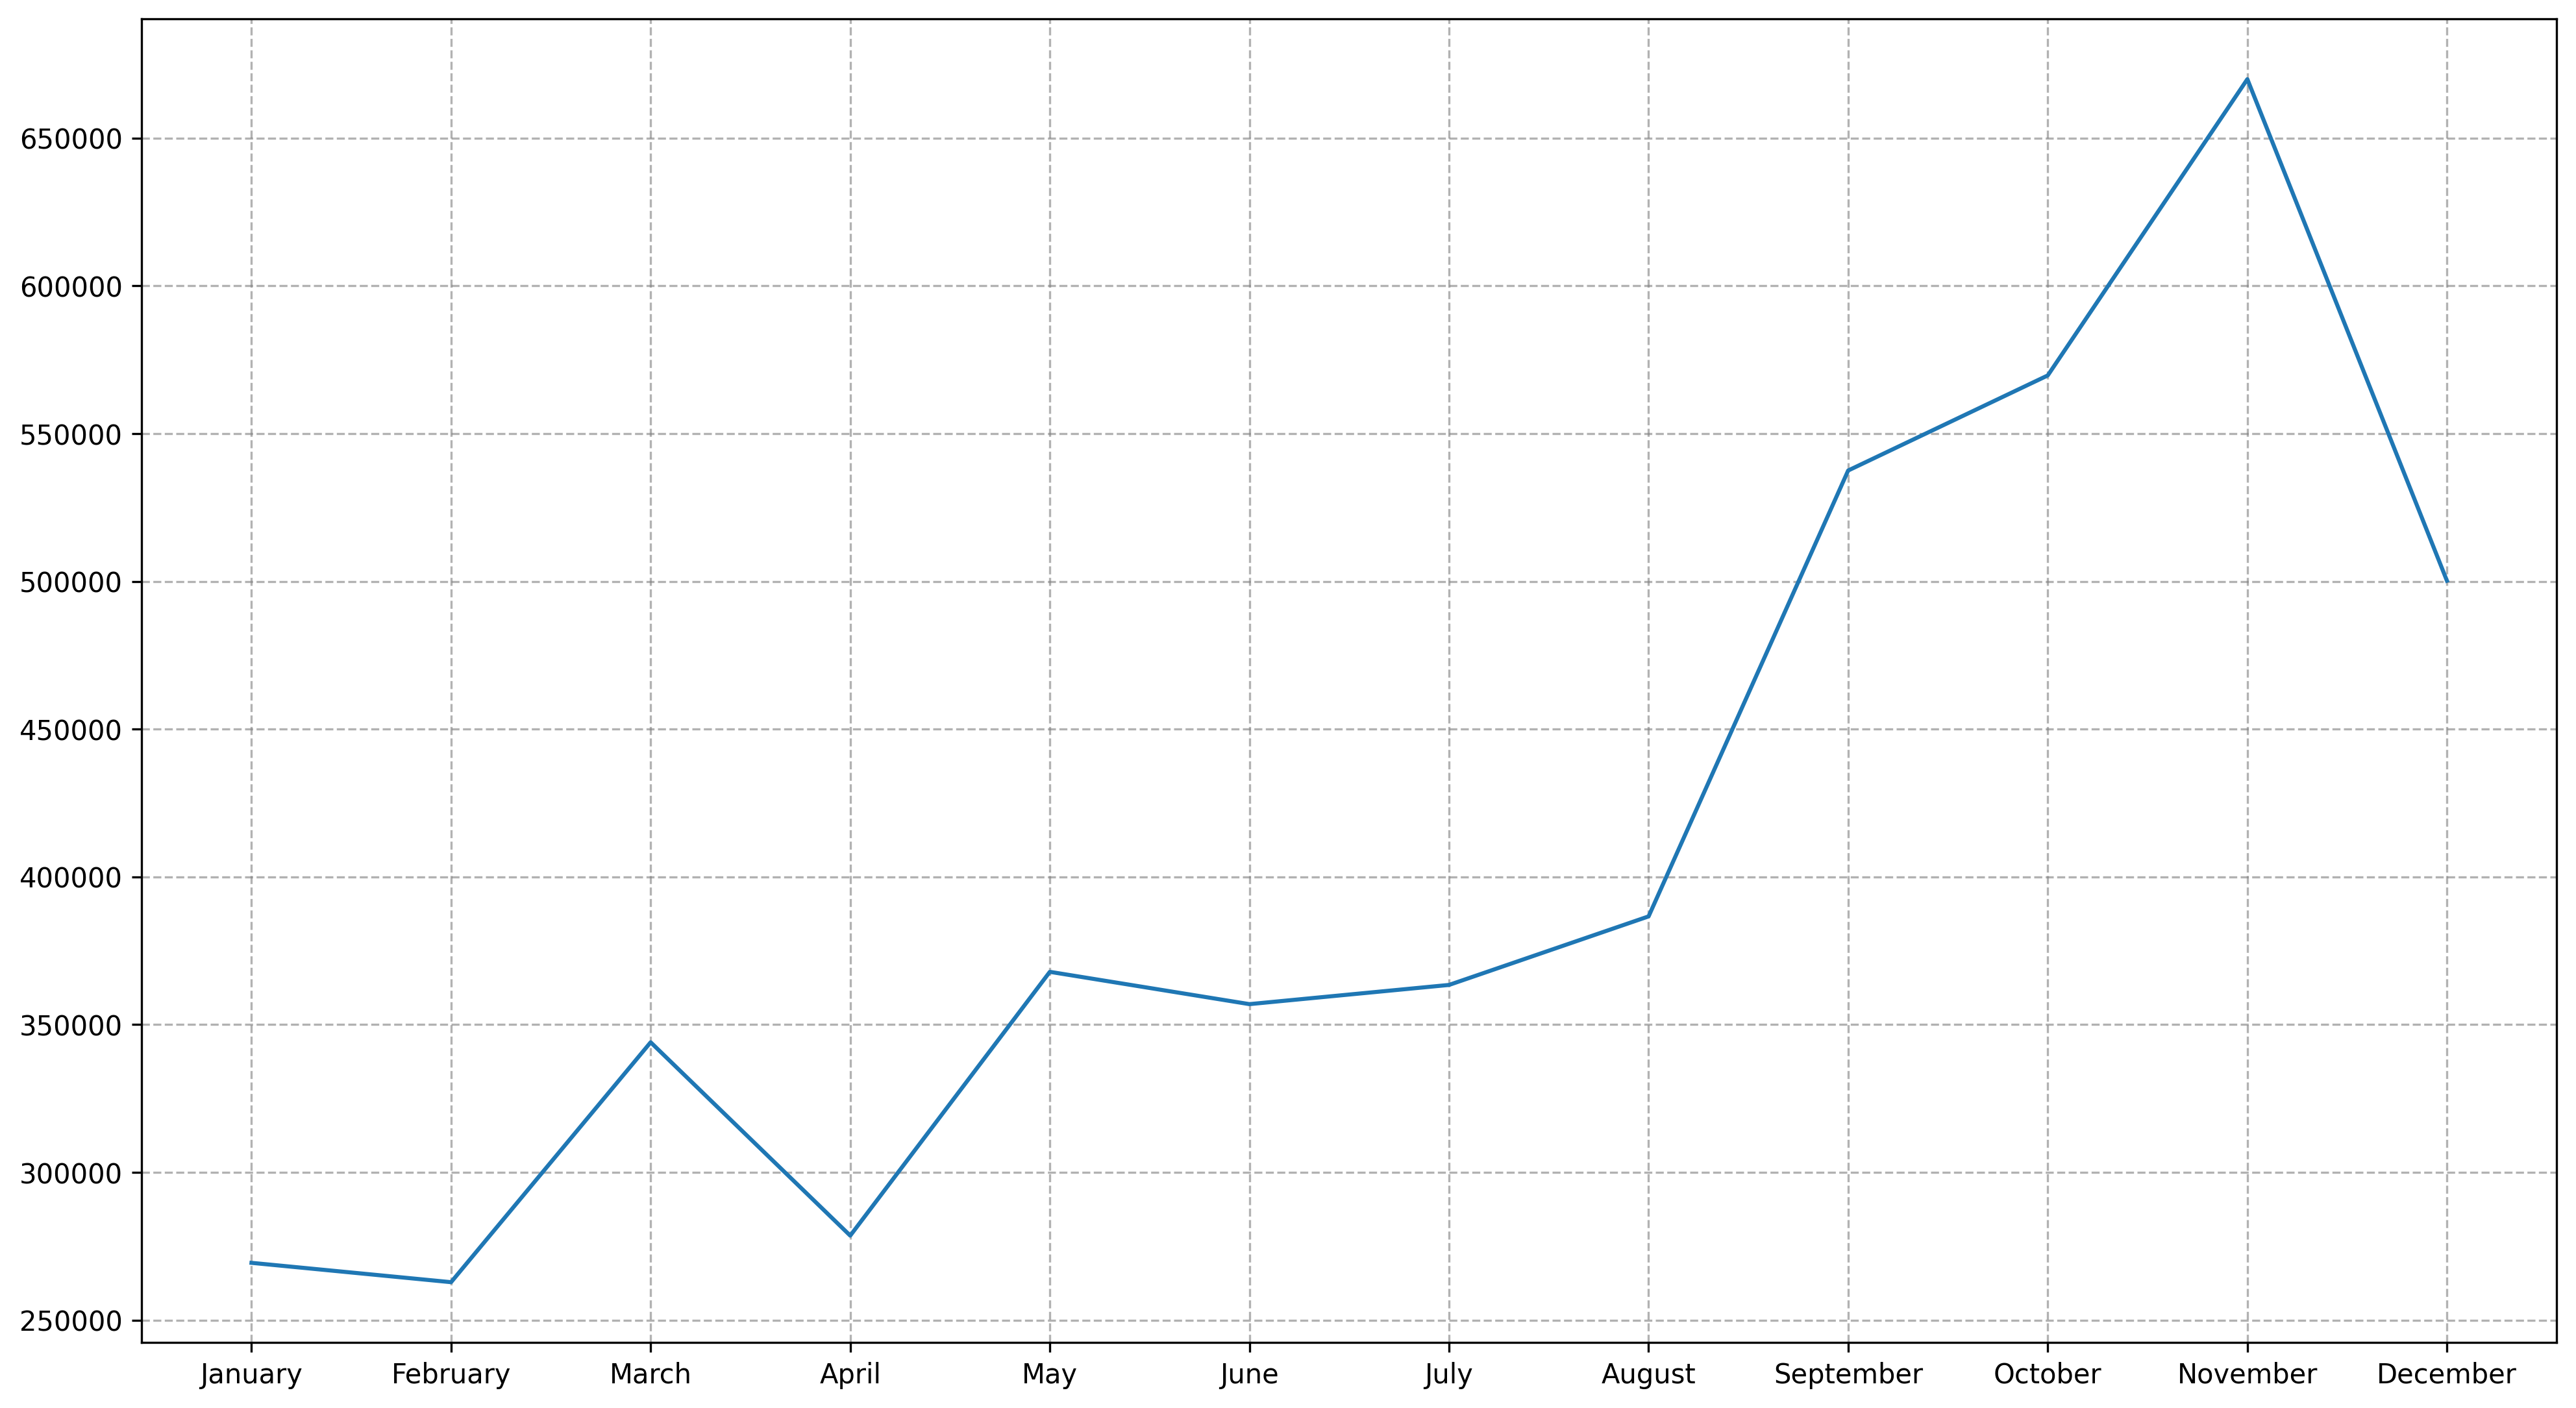

In [21]:
# корректируем оси

x_ = range(0, 12)
y_ = sales_time.values
months = ["January", "February",  "March", "April", "May", "June", "July", 
          "August", "September", "October", "November", "December"]

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)
ax.plot(x_, y_);

# фиксируем засечки по оси x – xticks
# фиксируем подписи к засечкам – xticklabels

ax.set_xticks(x_)
ax.set_xticklabels(months);

# сетка
ax.grid(color = 'grey', alpha = 0.6, linestyle = 'dashed');
ax.set_axisbelow(True)

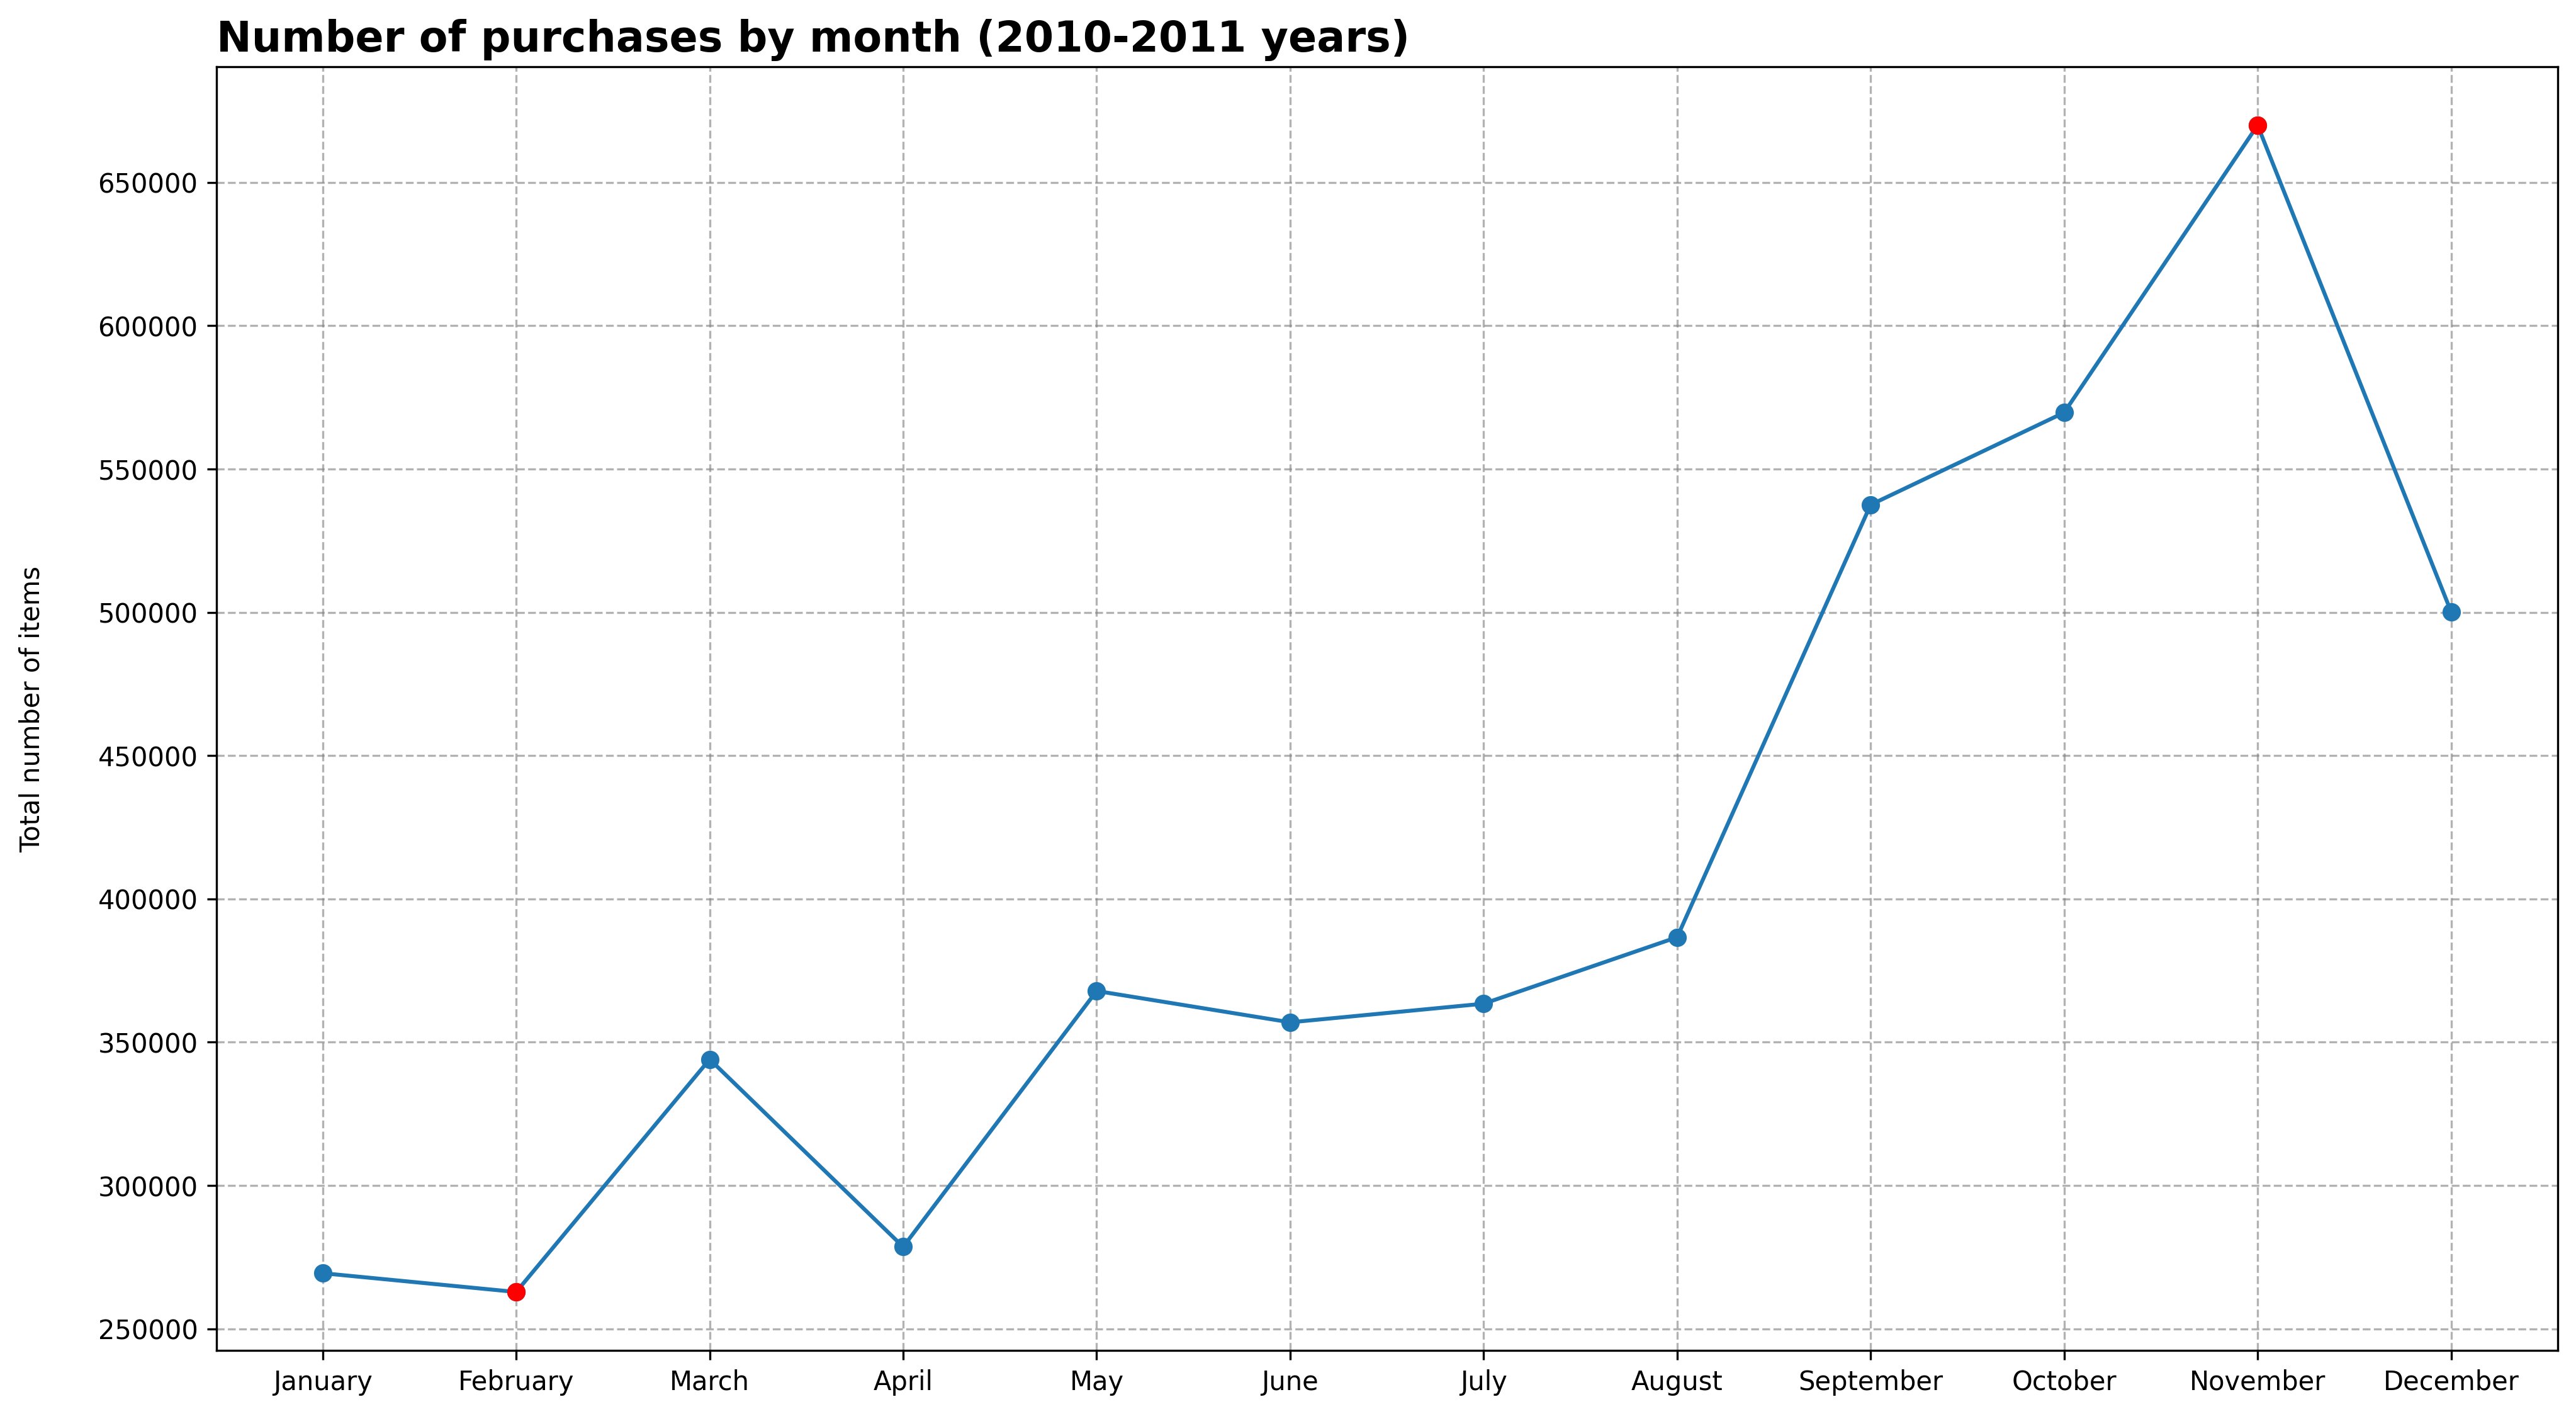

In [22]:
# отмечаем минимум и максимум

x_ = range(0, 12)
y_ = sales_time.values
months = ["January", "February",  "March", "April", "May", "June", "July", 
          "August", "September", "October", "November", "December"]

fig, ax = plt.subplots(figsize = (16, 9), dpi = 300)

# добавляем точки на линию
ax.plot(x_, y_, "-o");

ax.set_xticks(x_)
ax.set_xticklabels(months);

ax.grid(color = 'grey', alpha = 0.6, linestyle = 'dashed');
ax.set_axisbelow(True)

# точки с минимумом и максимумом

y_min, y_max = y_.min(), y_.max()
x_min, x_max = y_.argmin(), y_.argmax()

# еще одни точки поверх, но другого цвета

ax.plot([x_min, x_max], 
           [y_min, y_max], "ro");

# добавляем подписи

ax.set_title("Number of purchases by month (2010-2011 years)",
            loc = "left", 
            fontweight = "bold",
            fontsize = 16);

ax.set_ylabel("Total number of items", labelpad = 20);

### Задача 7: подготовка данных

Добавьте в исходный датафрейм столбец `TotalCost` с общей суммой покупки (без группировки по пользователям, просто произведение количества единиц товара и его цены). Отберите строки, которые соответствуют покупателям из стран в списке `chosen`.  

Сгруппируйте итоговый датафрейм по ID покупателя и сформируйте датафрейм, где по строкам – уникальные ID покупателей, а по столбцам – суммарные траты пользователя и страна, где он проживает. Сохраните результат в переменную `fin`.

In [24]:
chosen = ["Germany", "France", "Spain", "Italy"]

# добавление
sales["TotalCost"] = sales["UnitPrice"] * sales["Quantity"]

# фильтрация
small = sales[sales["Country"].isin(chosen)]

# агрегирование
# first – только первое название страны (везде одинаковое для одного пользователя)
fin = small.groupby("CustomerID").agg({"TotalCost": "sum", "Country" : "first"})
fin.head()

,TotalCost,Country
CustomerID,,
12349.0,1757.55,Italy
12354.0,1079.40,Spain
12413.0,694.15,France
12417.0,436.30,Spain
12421.0,806.27,Spain


### Задача 8: строим гистограммы по группам

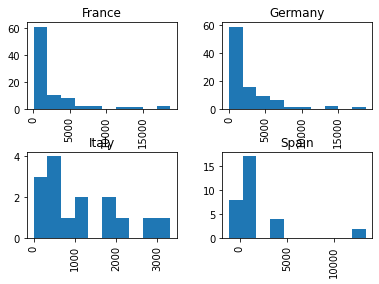

In [25]:
# без особых настроек

fin.hist("TotalCost", by = "Country", bins = 10);

In [26]:
# разбираемся с группировкой

grouped = fin.groupby("Country")

# ключи = страны
# по ключу через get_group() получаем данные

print(grouped.groups.keys())
print(grouped.get_group("France").head())

dict_keys(['France', 'Germany', 'Italy', 'Spain'])
            TotalCost Country
CustomerID                   
12413.0        694.15  France
12437.0       4896.66  France
12441.0        173.55  France
12488.0       1298.66  France
12489.0        334.93  France


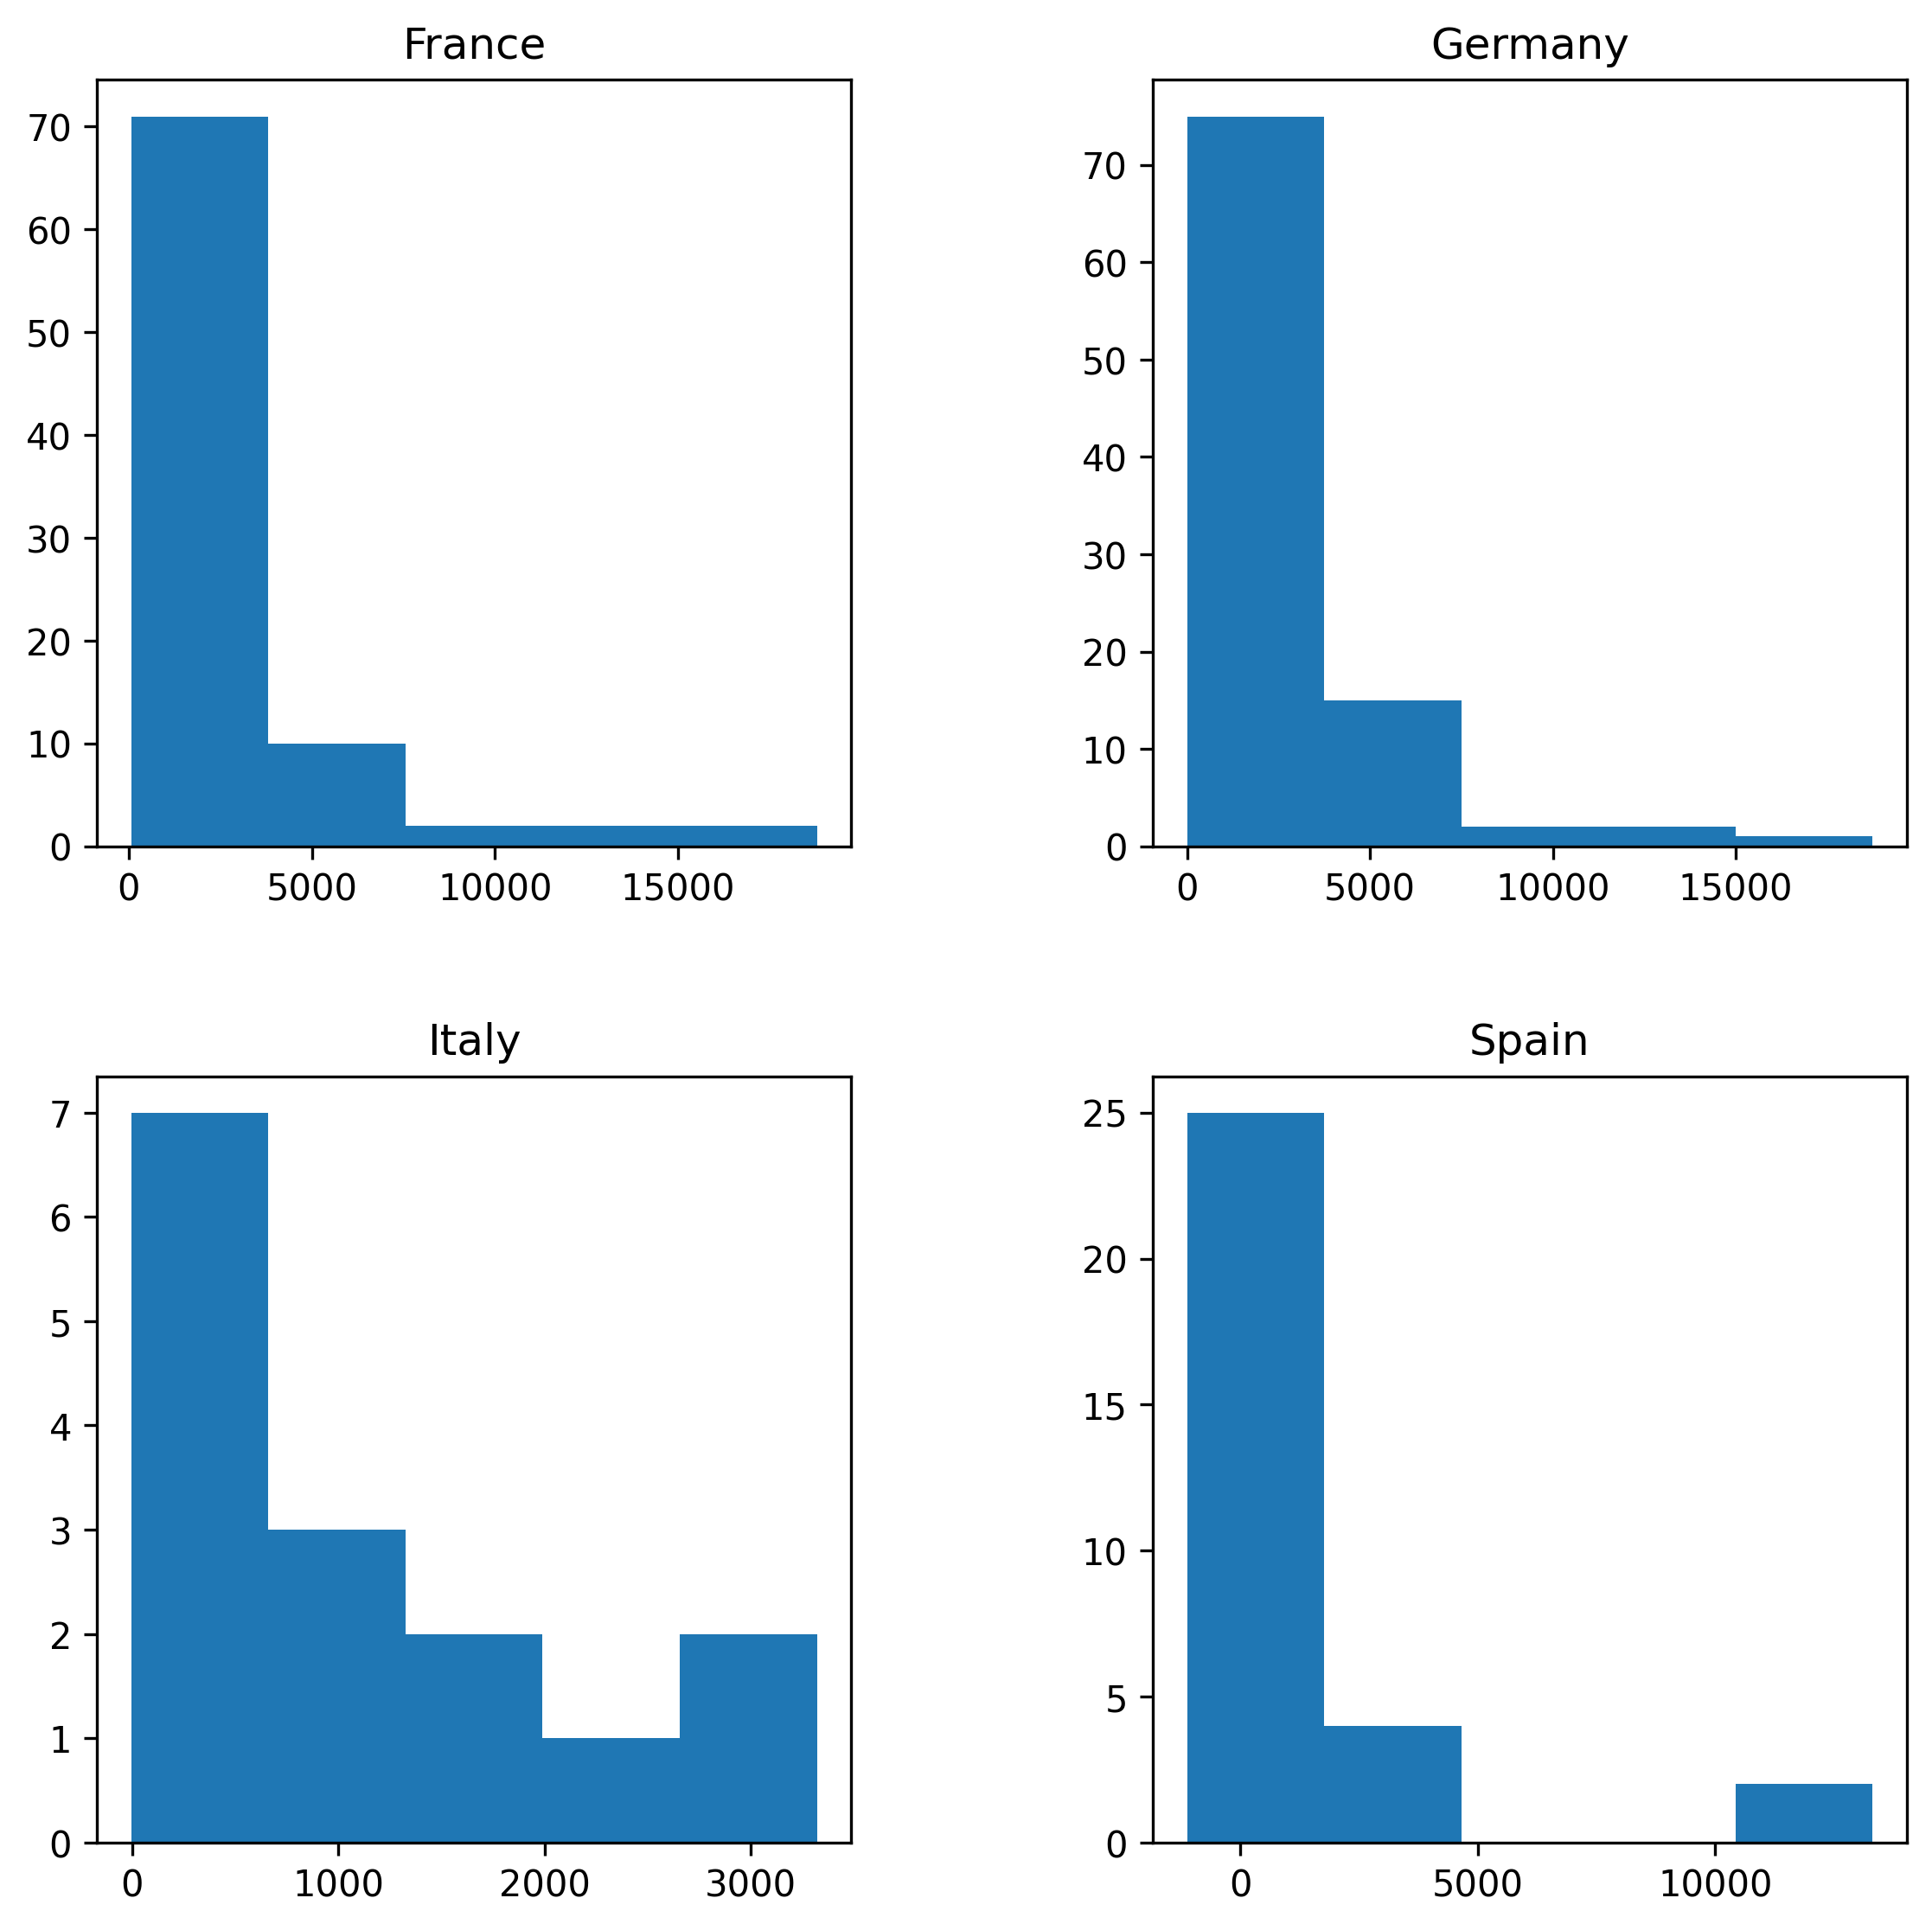

In [27]:
# используем группировку для отрисовки гистограмм
# сетка графиков из 2 строк и 2 столбцов
# gridspec_kw – настройки сетки, регулируем 
# расстояния между графиками по вертикали и горизонтали

fig, axs = plt.subplots(nrows = 2, ncols = 2, 
                        figsize = (9, 9), dpi = 300,
                        gridspec_kw = dict(hspace = 0.3, 
                                           wspace = 0.4));

# через zip() получаем пары (название страны, оси для графика)
targets = zip(grouped.groups.keys(), axs.flatten())

# перебираем пары
# выбираем данные по названию страны key
# в осях ax строим гистограмму для этих данных
# название key уходит в заголовок

for key, ax in targets:
    data = grouped.get_group(key)["TotalCost"]
    ax.hist(data, bins = 5)
    ax.set_title('%s' %key)

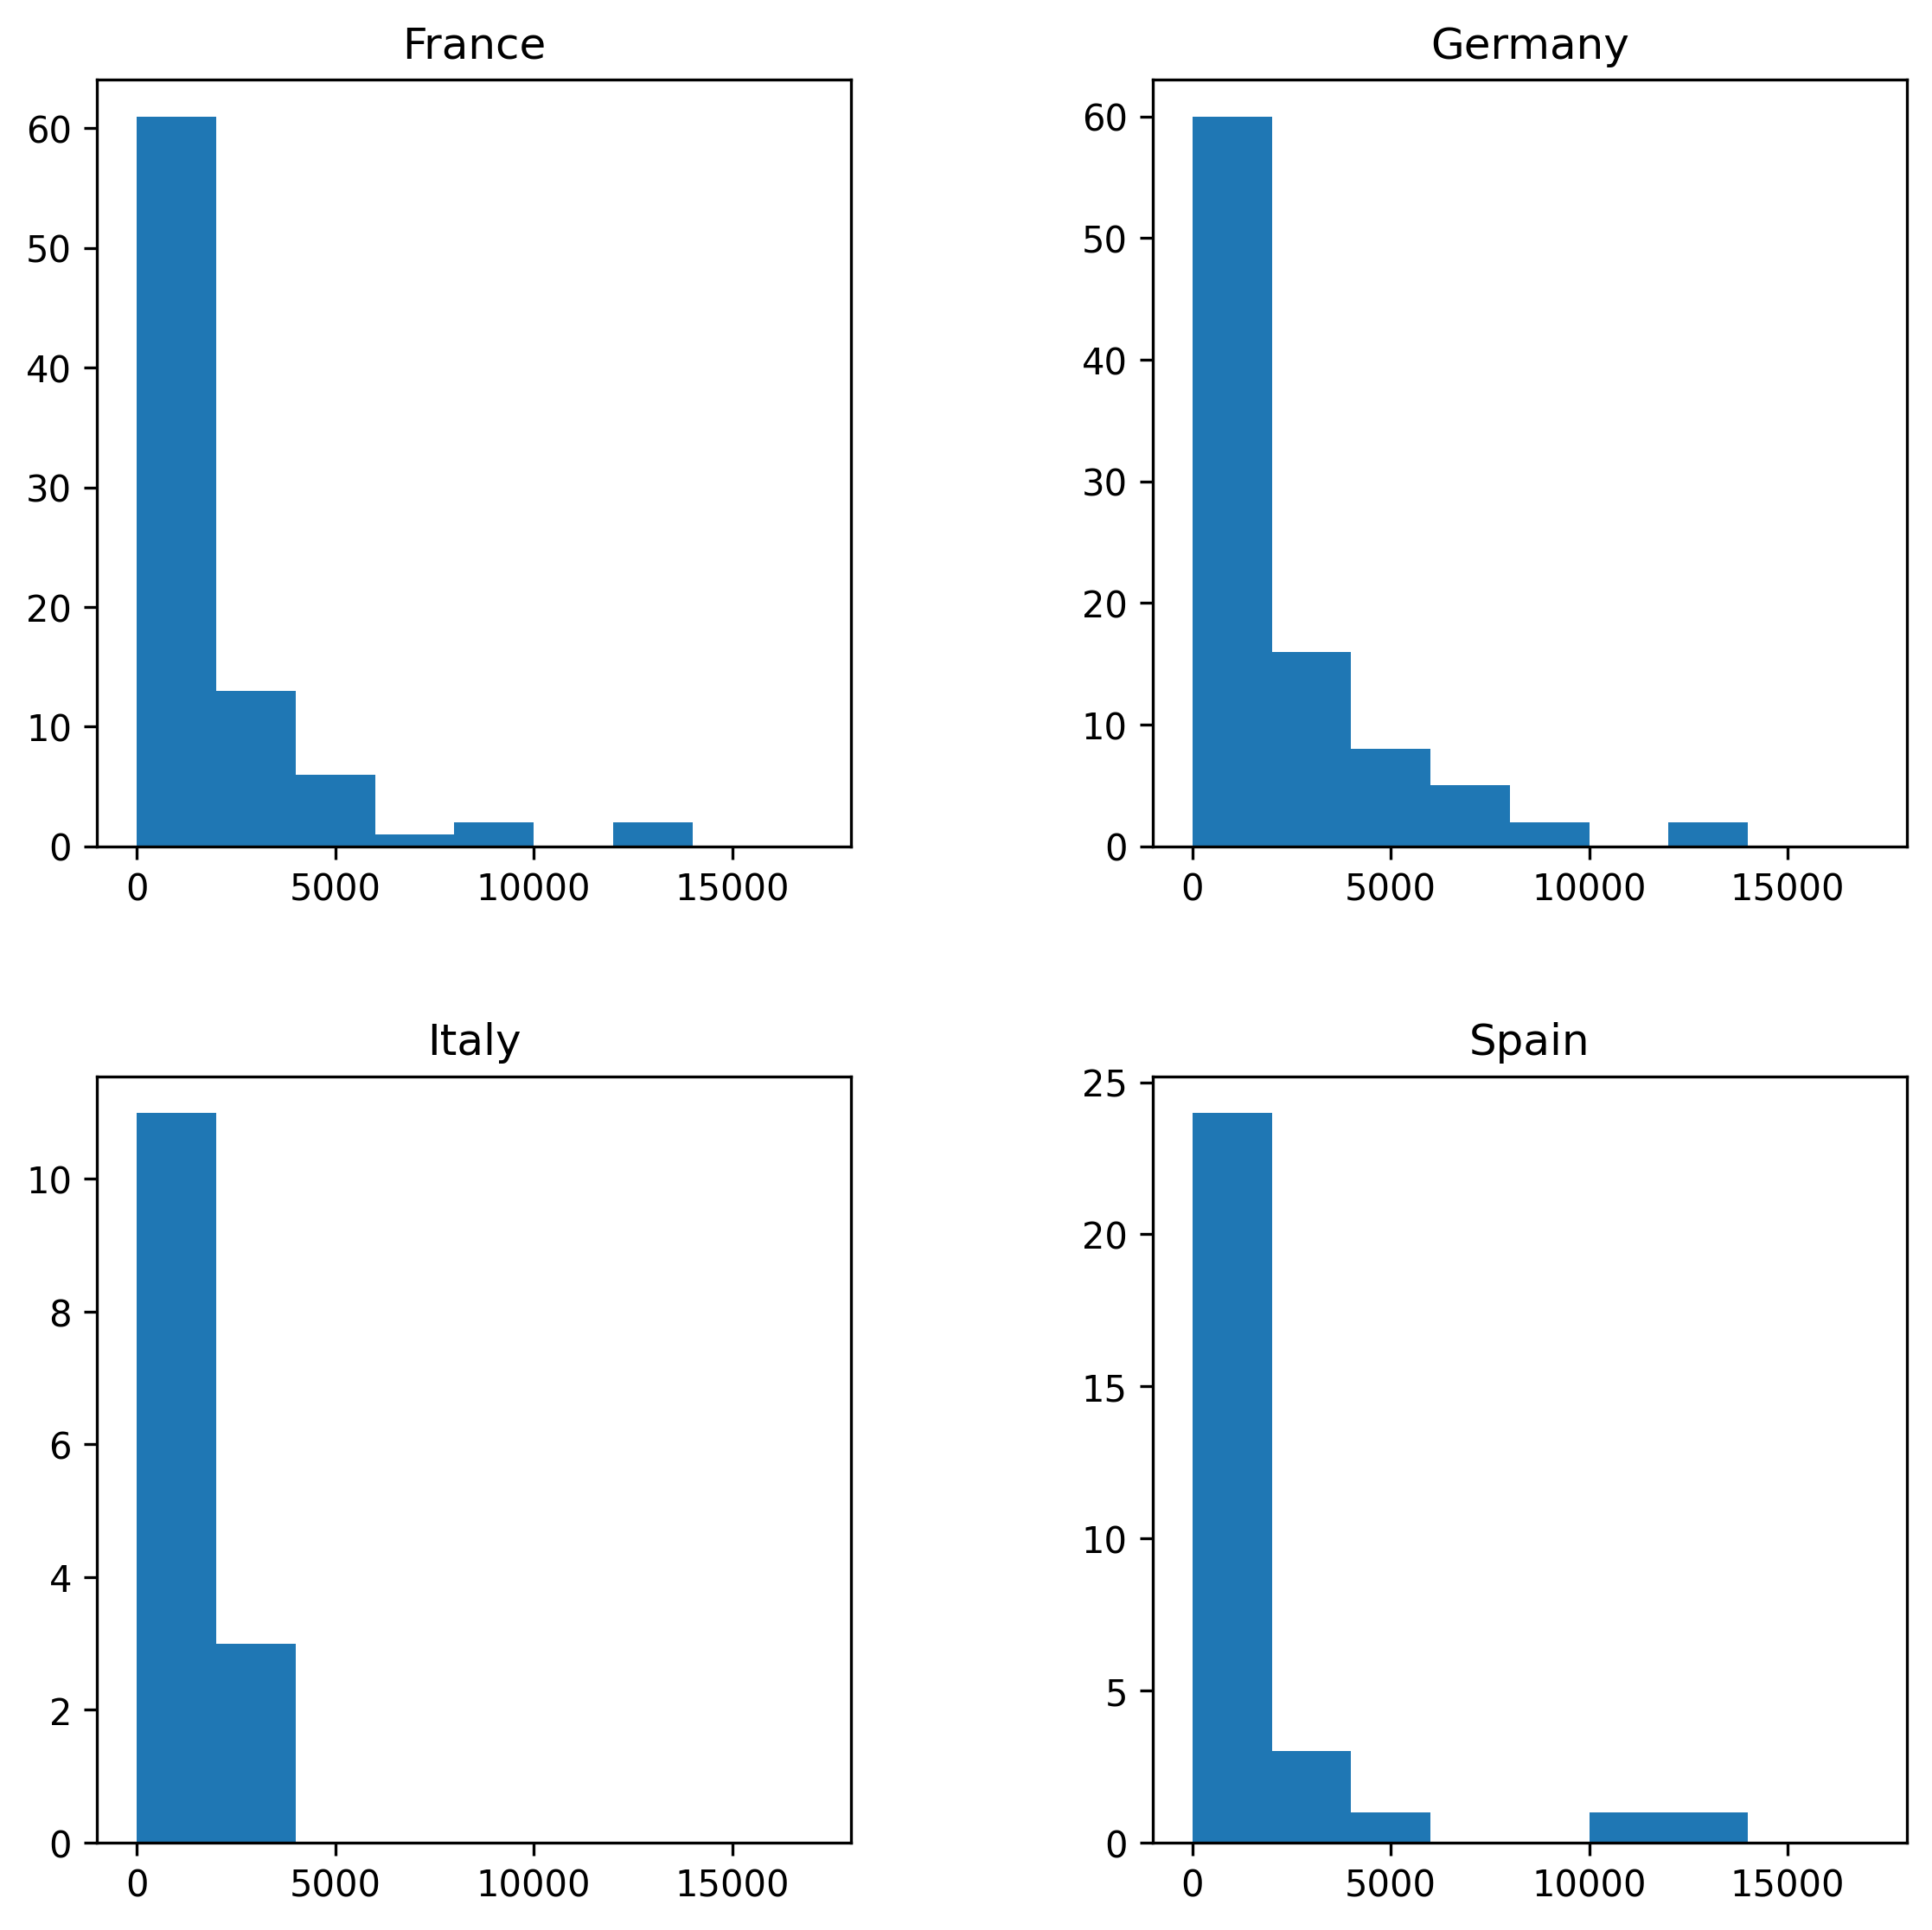

In [28]:
# унифицируем шаг гистограммы и оси

fig, axs = plt.subplots(nrows = 2, ncols = 2, 
                        figsize = (9, 9), dpi = 300,
                        gridspec_kw = dict(hspace = 0.3, 
                                           wspace = 0.4));

targets = zip(grouped.groups.keys(), axs.flatten())

# фиксированные значения в bins
# фиксированные границы по оси x

for key, ax in targets:
    data = grouped.get_group(key)["TotalCost"]
    ax.hist(data, bins = range(0, 18000, 2000))
    ax.set_title('%s' %key)
    ax.set_xlim(-1000, 18000)

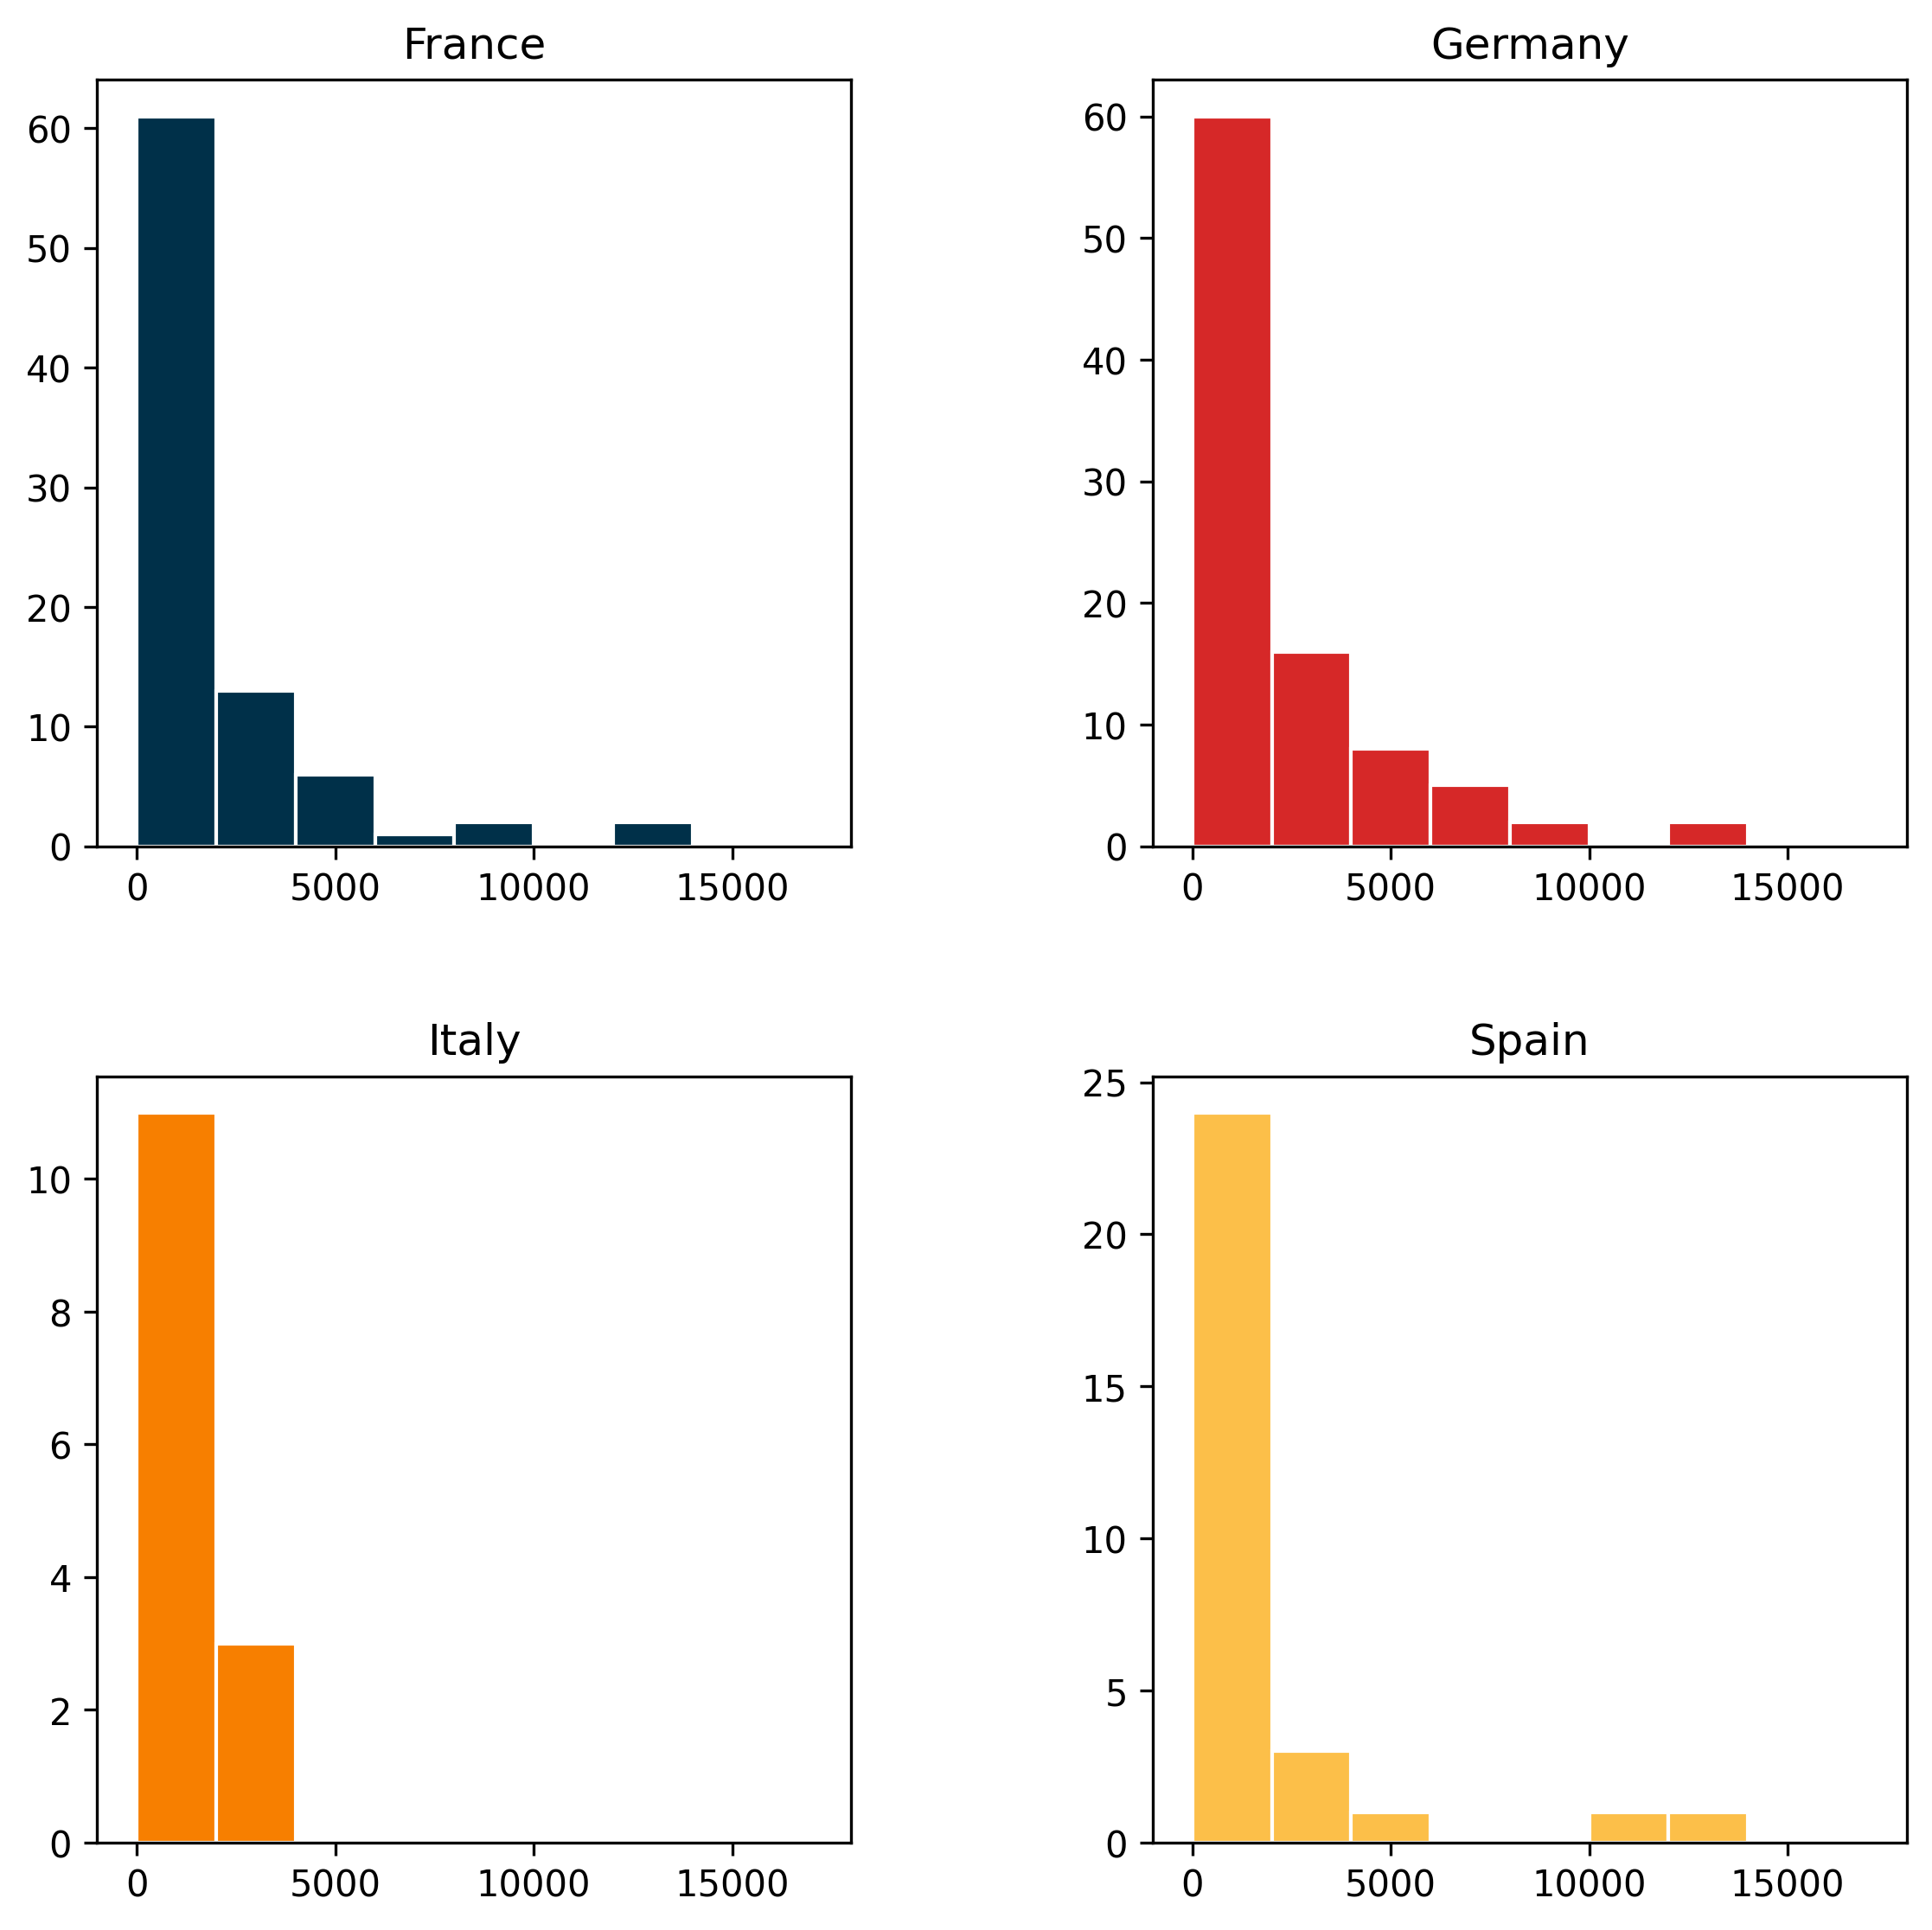

In [29]:
# меняем цвета – расширяем перечень в zip()
# для остальных настроек – похожая история

# унифицируем шаг гистограммы и оси

fig, axs = plt.subplots(nrows = 2, ncols = 2, 
                        figsize = (9, 9), dpi = 300,
                        gridspec_kw = dict(hspace = 0.3, 
                                           wspace = 0.4));

fill = ["#003049", "#D62828", "#F77F00", "#FCBF49"]


# через zip() получаем тройки (название страны, оси, цвет)

targets = zip(grouped.groups.keys(), axs.flatten(), fill)

# перебор по тройкам
# подстановка цвета

for key, ax, col in targets:
    data = grouped.get_group(key)["TotalCost"]
    ax.hist(data, bins = range(0, 18000, 2000), 
            color = col, edgecolor = "white")
    ax.set_title('%s' %key)
    ax.set_xlim(-1000, 18000)